In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Read data provided by the partner company

## Single dataset Jan-Feb 2017 

### Read Data

In [69]:
df17 = pd.read_csv('other_data/!01_02_17_VSE.csv', sep=';', encoding='cp1251', decimal=',')
df18 = pd.read_csv('other_data/!01_02_18_VSE.csv', sep=';', encoding='cp1251', decimal=',')

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/1684322804.py:2: DtypeWarning: Columns (9,10,11,14,16,20,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df18 = pd.read_csv('other_data/!01_02_18_VSE.csv', sep=';', encoding='cp1251', decimal=',')


In [70]:
df17

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДаты Заказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.01.2017 17:15,04.01.2017 0:00,3530280_TR,Возврат из ПВЗ,2 800,2 800,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"REIMA, ШАПКА Cabin (гол), р. 52",МГТ,Нет,NaN,1,1 400,1 400,"1 025,13",1,2 017,23111,Возврат,Москва,"374,87",0,0,2.0,0,01.01.2017 0:00,55575454-49504949555170,110109_nm19@gmail.com,Анжелика,IDL00023865048,0,NaN
1,01.01.2017 17:15,04.01.2017 0:00,3530280_TR,Возврат из ПВЗ,2 800,2 800,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"REIMA, ШАПКА Starrie (роз), р. 50",МГТ,Нет,NaN,1,1 400,1 400,"1 025,13",1,2 017,23111,Возврат,Москва,"374,87",0,0,1.0,0,01.01.2017 0:00,55575454-49504949555170,110109_nm19@gmail.com,Анжелика,IDL00022519452,0,NaN
2,01.01.2017 17:38,03.01.2017 0:00,3530303_TR,К отгрузке,3 585,3 585,Курьерская,Наличная,Москва,ПОДГУЗНИКИ,ПОДГУЗНИКИ,подгузники,ППКП,"ГУН, ПОДГУЗНИКИ, M (6-11 кг) (64 шт)",МГТ,Нет,NaN,3,1 195,3 585,"1 154,25",1,2 017,NaN,Доставлен,Москва,"122,25",0,0,1.0,0,01.01.2017 0:00,55574851-55555555555176,49117_1u16@mail.ru,Anastasia,IDL00038454553,0,NaN
3,01.01.2017 17:38,04.01.2017 0:00,3530318_TR,Доставлен,2 510,2 510,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,брюки,ОДЕЖДА,"LUHTA, БРЮКИ Kauto (черн), р.146",МГТ,Нет,NaN,1,2 510,2 510,"2 227,06",1,2 017,23111,Доставлен,Москва,"282,94",0,0,1.0,1,02.01.2017 0:00,55575054-56575354545171,115117_su21@mail.ru,Гость,IDL00035301654,0,NaN
4,01.01.2017 17:38,02.01.2017 0:00,3530313_TR,К отгрузке,1 069,1 069,Самовывоз,Наличная,Санкт-Петербург,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,ИГРУШКИ,"LEGO Friends, КОНСТРУКТОР Поп-звезда: телестуд...",МГТ,Нет,NaN,1,1 069,1 069,"985,03",1,2 017,901000646,Доставлен,Регионы,"83,97",0,0,1.0,1,02.01.2017 0:00,55575149-50524951545076,106117_ju18@yandex.ru,Гость,ID9010025983048,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542498,28.02.2017 23:31,04.03.2017 0:00,3998703_TR,Доставлен,4 824,4 824,Магазины,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,"треки, парковки",ИГРУШКИ,"HOT WHEELS, НАБОР игровой Битва с драконом",МГТ,Нет,NaN,1,2 678,2 678,"2 242,90",2,2 017,GL0285876,Доставлен,Москва,"435,1",0,0,NaN,1,28.02.2017 0:00,55574954-56495057575776,guest_103117_gu25@detoc.ru,Гость,IDL00043615351,0,NaN
542499,28.02.2017 23:47,02.03.2017 0:00,3998817_TR,К отгрузке,5 435,5 435,Курьерская,Наличная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,каталки ручные,ИГРУШКИ,"MATTEL, КАТАЛКА Fisher-Price Слоник",МГТ,Нет,NaN,1,1 249,1 249,"1 163,80",2,2 017,NaN,Доставлен,Москва,"85,2",0,0,NaN,0,28.02.2017 0:00,55574953-50535154545676,107117_ku21@mail.ru,Кристина,IDL00006539250,0,NaN
542500,28.02.2017 23:47,03.03.2017 0:00,3998822_TR,Доставлен,11 810,11 810,Магазины,Безналичная,Щербинка (Московская область район),ОБУВЬ,ОБУВЬ ДЕТСКАЯ,сандально-туфельная группа,ОДЕЖДА,"ТАШИ ОРТО, САНДАЛИИ закрытые, (син+бел), р. 19",МГТ,Нет,NaN,1,2 590,2 590,1 440,2,2 017,23111,Доставлен,МО,1 150,0,0,NaN,0,28.02.2017 0:00,55575053-51485554494970,98109_bm21@gmail.com,Гость,IDL00044538654,0,NaN
542501,28.02.2017 23:47,03.03.2017 0:00,3998822_TR,Доставлен,11 810,11 810,Магазины,Безналичная,Щербинка (Московская область район),ОБУВЬ,ОБУВЬ ДЕТСКАЯ,сандально-туфельная группа,ОДЕЖДА,"ТАШИ ОРТО, САНДАЛИИ закрытые, (син+бел), р. 18",МГТ,Нет,NaN,1,2 590,2 590,1 440,2,2 017,23111,Доставлен,МО,1 150,0,0,NaN,1,28.02.2017 0:00,55575053-51485554494970,98109_bm21@gma

In [71]:
df17['ТипТовара'].unique()


array(['МГТ', 'КГТ', nan], dtype=object)

In [72]:
df17['Гео'].unique()

array(['Москва', 'Регионы', 'МО'], dtype=object)

In [73]:
df17.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДаты Заказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')

### What data is presented in the dataset? 

In [ ]:
columns = df17.columns.tolist()

for i in range(0, len(columns), 5):
    print(', '.join(columns[i:i+5]))



Дата, ДатаДоставки, НомерЗаказаНаСайте, НовыйСтатус, СуммаЗаказаНаСайте
СуммаДокумента, МетодДоставки, ФормаОплаты, Регион, Группа2
Группа3, Группа4, Тип, Номенклатура, ТипТовара
Отменено, ПричинаОтмены, Количество, Цена, СуммаСтроки
ЦенаЗакупки, МесяцДаты Заказа, ГодДатыЗаказа, ПВЗ_код, Статус
Гео, Маржа, СуммаУслуг, СуммаДоставки, НомерСтроки
КоличествоПроданоКлиенту, ДатаЗаказаНаСайте, Телефон_new, ЭлектроннаяПочта_new, Клиент
ID_SKU, ГородМагазина, МагазинЗаказа


In [ ]:
df17.describe()

,Количество,МесяцДаты Заказа,НомерСтроки,КоличествоПроданоКлиенту
count,542503.000000,542503.000000,286689.000000,542503.000000
mean,1.386123,1.471544,4.966319,1.129909
std,1.949884,0.499190,6.962486,1.853598
min,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,3.000000,1.000000
75%,1.000000,2.000000,6.000000,1.000000
max,190.000000,2.000000,136.000000,190.000000


In [ ]:
null_counts = df17.isnull().sum()
null_counts

Дата                             0
ДатаДоставки                   394
НомерЗаказаНаСайте               0
НовыйСтатус                      0
СуммаЗаказаНаСайте               0
СуммаДокумента                   0
МетодДоставки                    0
ФормаОплаты                      3
Регион                        4467
Группа2                      46540
Группа3                      46540
Группа4                      71624
Тип                              0
Номенклатура                     0
ТипТовара                    46540
Отменено                         0
ПричинаОтмены               493115
Количество                       0
Цена                             0
СуммаСтроки                      0
ЦенаЗакупки                  49436
МесяцДаты Заказа                 0
ГодДатыЗаказа                    0
ПВЗ_код                     211655
Статус                           0
Гео                              0
Маржа                        49436
СуммаУслуг                       0
СуммаДоставки       

### Merging datasets

In [ ]:
if 'Телефон_new' in df17.columns and 'Телефон_new' in df18.columns:
    matching_phones = set(df17['Телефон_new']).intersection(set(df18['Телефон_new']))
    count_matching_phones = len(matching_phones)
else:
    count_matching_phones = 0
    matching_phones = set()

count_matching_phones

13665

In [ ]:
total_data = pd.concat([df17, df18]).drop_duplicates()

print(df17.shape)
print(df18.shape)
print(total_data.shape)

(542503, 38)
(693710, 38)
(1227218, 39)


### Data Cleaning 

In [ ]:
total_data = df17

In [ ]:
# Оставляем заказы только с терминальными статусами
terminal_statuses = ['Доставлен', 'Отменен', 'Возврат']

total_data = total_data[total_data['НовыйСтатус'].isin(terminal_statuses)]
print(f"Количество записей в терминальных статусах: {len(total_data)}")


Количество записей в терминальных статусах: 242469


In [ ]:
total_data = total_data.dropna(subset=['ДатаДоставки', 'ДатаЗаказаНаСайте'])
print(f"Размер данных после удаления строк с пропусками: {total_data.shape}")

Размер данных после удаления строк с пропусками: (242075, 38)


In [ ]:
# Убираем пустные значения в столбце "Регион", заменяя их на значения из столбца "Город магазина"
total_data['Регион'] = total_data['Регион'].fillna(total_data['ГородМагазина'])
total_data = total_data[(total_data['Регион'] != '0')]
print(f"Размер данных после удаления строк: {total_data.shape}")

Размер данных после удаления строк: (241784, 38)


In [ ]:
# Доставка не может являться полноценным заказом: удалить все строки с "Доставка" в столбце "Номенклатура" и соответственно в столбцах "Группа2"
df_delivary = total_data[(total_data['Номенклатура'] == 'Доставка') | (total_data['Группа2'] == 'Доставка')]
total_data = total_data[(total_data['Номенклатура'] != 'Доставка')]
total_data = total_data[(total_data['Группа2'] != 'Доставка')]
print(f"Размер данных после удаления строк: {total_data.shape}")

Размер данных после удаления строк: (211242, 38)


In [ ]:
# Телефон не '0'
total_data = total_data[(total_data['Телефон_new'] != '0')]
print(f"Размер данных после удаления строк: {total_data.shape}")

Размер данных после удаления строк: (209610, 38)


In [ ]:
# Удаление строк с NaN
columns_to_check = ['Группа2', 'Группа3', 'МетодДоставки', 'ФормаОплаты']
total_data = total_data.dropna(subset=columns_to_check)
print(f"Размер данных после удаления NaN в колонках: {total_data.shape}")

Размер данных после удаления NaN в колонках: (209610, 38)


In [ ]:
print(f"Количество пропусков в колонке 'ДатаЗаказаНаСайте': {total_data['ДатаЗаказаНаСайте'].isnull().sum()}")
print(f"Количество пропусков в колонке 'ДатаДоставки': {total_data['ДатаДоставки'].isnull().sum()}")

Количество пропусков в колонке 'ДатаЗаказаНаСайте': 0
Количество пропусков в колонке 'ДатаДоставки': 0


In [ ]:
# Убираем пробелы
total_data['СуммаДокумента'] = total_data['СуммаДокумента'].replace(r'\s+','',regex=True)
total_data['Цена'] = total_data['Цена'].replace(r'\s+','',regex=True)
total_data['ЦенаЗакупки'] = total_data['ЦенаЗакупки'].replace(r'\s+','',regex=True)
total_data['СуммаЗаказаНаСайте'] = total_data['СуммаЗаказаНаСайте'].str.replace(r'\s+', '', regex=True).str.replace(',', '.').astype(float)


# Запятые на точки
total_data['СуммаДокумента'] = total_data['СуммаДокумента'].replace(',','.',regex=True)
total_data['Цена'] = total_data['Цена'].replace(',','.',regex=True)
total_data['ЦенаЗакупки'] = total_data['ЦенаЗакупки'].replace(',','.',regex=True)

# object2float
total_data['СуммаДокумента'] = pd.to_numeric(total_data['СуммаДокумента'],errors = 'coerce')
total_data['Цена'] = pd.to_numeric(df17['Цена'],errors = 'coerce')
total_data['ЦенаЗакупки'] = pd.to_numeric(total_data['ЦенаЗакупки'],errors = 'coerce')

In [ ]:
# Заполнение пустых значений в колонке 'Маржа'
total_data['Маржа'] = total_data['Маржа'].fillna((total_data['Цена'] * total_data['Количество']) - total_data['ЦенаЗакупки'])
total_data = total_data.dropna(subset=['Маржа'])

print(f"Размер данных: {total_data.shape}")
print(f"Количество пропусков в колонке 'Маржа': {total_data['Маржа'].isnull().sum()}")

Размер данных: (208122, 38)
Количество пропусков в колонке 'Маржа': 0


In [ ]:
# Заполняем пропуски в колонке 'Отменено' и 'ПричинаОтмены'
total_data['Отменено'] = total_data['Отменено'].fillna('Нет')
total_data['ПричинаОтмены'] = total_data['ПричинаОтмены'].fillna('Нет')


# Замена NaN в колонке 'ПричинаОтмены'
total_data['ПричинаОтмены'] = total_data['ПричинаОтмены'].fillna('Отмены нет')
print(f"Количество пропусков в колонке 'ПричинаОтмены': {total_data['ПричинаОтмены'].isnull().sum()}")


Количество пропусков в колонке 'ПричинаОтмены': 0


In [ ]:
# Замена NaN в колонке 'НомерСтроки' на 0
total_data['НомерСтроки'] = total_data['НомерСтроки'].fillna(0)

In [ ]:
# Удаление дубликатов
total_data.drop_duplicates(inplace=True)

In [ ]:
# Преобразуем даты в datetime
total_data['ДатаЗаказаНаСайте'] = total_data['ДатаЗаказаНаСайте'].astype(str)
total_data['ДатаДоставки'] = total_data['ДатаДоставки'].astype(str)

total_data['ДатаЗаказаНаСайте'] = total_data['ДатаЗаказаНаСайте'].str.replace(r' 0:00$', ' 00:00:00', regex=True)
total_data['ДатаДоставки'] = total_data['ДатаДоставки'].str.replace(r' 0:00$', ' 00:00:00', regex=True)

total_data['ДатаЗаказаНаСайте'] = pd.to_datetime(total_data['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
total_data['ДатаДоставки'] = pd.to_datetime(total_data['ДатаДоставки'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

total_data = total_data.dropna(subset=['ДатаЗаказаНаСайте', 'ДатаДоставки'])
print(f"Размер данных после очистки: {total_data.shape}")


Размер данных после очистки: (207305, 38)


In [ ]:
# Удаляем строки с NaN в критических колонках
total_data = total_data.dropna(subset=['ДатаЗаказаНаСайте', 'СуммаЗаказаНаСайте', 'Количество'])
print(f"Размер данных после очистки: {total_data.shape}")

Размер данных после очистки: (207305, 38)


In [ ]:
# Оставляем только нужные колонки
vitrina_columns = [ 
    'Телефон_new', 'НомерЗаказаНаСайте', 'Статус',
    'ДатаЗаказаНаСайте', 'ДатаДоставки', 'СуммаЗаказаНаСайте',
    'ID_SKU', 'Тип', 'Группа2', 'Группа3', 'КоличествоПроданоКлиенту', 
    'Количество', 'Цена', 'Отменено', 'ПричинаОтмены',
    'Маржа', 'НомерСтроки', 'Регион', 'Гео',
    'МетодДоставки', 'ФормаОплаты'
]

total_data = total_data[[col for col in vitrina_columns if col in total_data.columns]]
total_data = total_data.sort_values(by=['Телефон_new', 'НомерЗаказаНаСайте', 'НомерСтроки'])

print("\nРазмер данных:", total_data.shape)


Размер данных: (207305, 21)


In [ ]:
total_data

,Телефон_new,НомерЗаказаНаСайте,Статус,ДатаЗаказаНаСайте,ДатаДоставки,СуммаЗаказаНаСайте,ID_SKU,Тип,Группа2,Группа3,КоличествоПроданоКлиенту,Количество,Цена,Отменено,ПричинаОтмены,Маржа,НомерСтроки,Регион,Гео,МетодДоставки,ФормаОплаты
379,55515349-57485648545575,1984000165_TR,Доставлен,2017-01-01,2017-01-18,11500.0,ID000sm-7840957,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,1,1,NaN,Нет,Нет,2 706,1.0,Челябинск,Регионы,Магазины,Безналичная
388230,55525753-50535655495477,3858229_TR,Отменен,2017-02-11,2017-02-16,900.0,ID9010016895149,ППКП,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,СОСКИ/ПУСТЫШКИ,2,0,300.0,Да,Авто корректировка склада,0,0.0,Москва,Москва,Курьерская,Наличная
100634,55525753-52545049494874,3617557_TR,Доставлен,2017-01-15,2017-01-17,488.0,ID10022107250,ППКП,ДЕТСКОЕ ПИТАНИЕ,ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,1,1,439.0,Нет,Нет,20,1.0,Москва,Москва,Магазины,Безналичная
109625,55525753-55555651515678,3626239_TR,Доставлен,2017-01-24,2017-01-18,627.0,ID10022107250,ИГРУШКИ,ИГРУШКИ,МЯГКИЕ ИГРУШКИ,1,1,578.0,Нет,Нет,"165,01",1.0,Москва,Москва,Магазины,Безналичная
418300,55525753-55575357555171,2022000080_TR,Доставлен,2017-02-06,2017-02-15,4365.0,IDL00039993957,КГТ,КРУПНОГАБАРИТНЫЙ ТОВАР,МАНЕЖИ/ШЕЗЛОНГИ,1,1,NaN,Нет,Нет,"884,83",0.0,Москва,Регионы,Магазины,Безналичная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165310,57525753-50505748484899,3676225_TR,Возврат,2017-01-18,2017-01-26,5980.0,IDL00019923351,ИГРУШКИ,ИГРУШКИ,КОНСТРУКТОРЫ,0,5,349.0,Нет,Нет,"84,55",3.0,Москва,Москва,Курьерская,Наличная
165311,57525753-50505748484899,3676225_TR,Возврат,2017-01-18,2017-01-26,5980.0,ID10000768856,ИГРУШКИ,ИГРУШКИ,КОНСТРУКТОРЫ,0,5,249.0,Нет,Нет,"-415,45",4.0,Москва,Москва,Курьерская,Наличная
92002,57555554-50515456504890,3608731_TR,Доставлен,2017-01-03,2017-01-20,539.0,ID10022107250,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,1,1,490.0,Нет,Нет,"171,47",1.0,Москва,Москва,Магазины,Безналичная
369759,71764848-484951505252G4,3906076_TR,Отменен,2017-02-16,2017-02-23,5999.0,IDL00013244452,ИГРУШКИ,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,1,1,NaN,Да,"1.4 Ошибка выбора, будет новый заказ","3 613,48",0.0,Москва,Москва,Pick point,Безналичная


In [ ]:
mass = total_data.agg(["nunique",
               (lambda x: x.nunique() / len(x) * 100),
               (lambda x: x.isin([0]).sum()), 
               (lambda x: x.isin([0]).sum() / len(x) * 100),
               (lambda x: x.isna().sum()), 
               (lambda x: x.isna().sum() / len(x) * 100),]).transpose()

mass.columns = ["Unique", "Percent unique", "Zeros", "Percent zeros", "NaNs", "Percent NaNs",] 
mass 

,Unique,Percent unique,Zeros,Percent zeros,NaNs,Percent NaNs
Телефон_new,59458.0,28.681411,0.0,0.000000,0.0,0.000000
НомерЗаказаНаСайте,77809.0,37.533586,0.0,0.000000,0.0,0.000000
Статус,3.0,0.001447,0.0,0.000000,0.0,0.000000
ДатаЗаказаНаСайте,65.0,0.031355,0.0,0.000000,0.0,0.000000
ДатаДоставки,113.0,0.054509,0.0,0.000000,0.0,0.000000
СуммаЗаказаНаСайте,9041.0,4.361207,0.0,0.000000,0.0,0.000000
ID_SKU,48150.0,23.226647,0.0,0.000000,0.0,0.000000
Тип,5.0,0.002412,0.0,0.000000,0.0,0.000000
Группа2,12.0,0.005789,0.0,0.000000,0.0,0.000000
Группа3,83.0,0.040038,0.0,0.000000,0.0,0.000000


### Data Aggregation

In [ ]:
df = total_data
df.dtypes

Телефон_new                         object
НомерЗаказаНаСайте                  object
Статус                              object
ДатаЗаказаНаСайте           datetime64[ns]
ДатаДоставки                datetime64[ns]
СуммаЗаказаНаСайте                 float64
ID_SKU                              object
Тип                                 object
Группа2                             object
Группа3                             object
КоличествоПроданоКлиенту             int64
Количество                           int64
Цена                               float64
Отменено                            object
ПричинаОтмены                       object
Маржа                               object
НомерСтроки                        float64
Регион                              object
Гео                                 object
МетодДоставки                       object
ФормаОплаты                         object
dtype: object

In [ ]:
from datetime import timedelta

current_date = total_data['ДатаЗаказаНаСайте'].max() + timedelta(days=1)
current_date

Timestamp('2017-03-01 00:00:00')

In [ ]:
aggregated_data = total_data.groupby('Телефон_new').agg(
    total_orders=('НомерЗаказаНаСайте', 'nunique'),                                                         # Общее количество заказов
    total_items=('Количество', 'sum'),                                                                      # Общее количество товаров
    total_spent=('СуммаЗаказаНаСайте', 'sum'),                                                              # Общая сумма покупок
    average_order_value=('СуммаЗаказаНаСайте', 'mean'),                                                     # Средний чек
    first_purchase=('ДатаЗаказаНаСайте', 'min'),                                                            # Дата первой покупки
    last_purchase=('ДатаЗаказаНаСайте', 'max'),                                                             # Дата последней покупки
    total_canceled_orders=('Отменено', lambda x: (x == 'Да').sum()),                                        # Количество отмененных заказов
    cancel_ratio=('Отменено', lambda x: (x == 'Да').mean()),                                                # Доля отмененных заказов
    most_common_cancel_reason=('ПричинаОтмены', lambda x: x.mode()[0] if not x.mode().empty else 'Нет'),    # Самая частая причина отмены
    total_returned_orders=('Статус', lambda x: (x == 'Возврат').sum()),                                     # Количество возвратов
    delivery_methods=('МетодДоставки', lambda x: x.mode()[0] if not x.mode().empty else 'Нет'),             # Самый частый метод доставки
    payment_methods=('ФормаОплаты', lambda x: x.mode()[0] if not x.mode().empty else 'Нет')                 # Самая частая форма оплаты
).reset_index()

aggregated_data.head()

,Телефон_new,total_orders,total_items,total_spent,average_order_value,first_purchase,last_purchase,total_canceled_orders,cancel_ratio,most_common_cancel_reason,total_returned_orders,delivery_methods,payment_methods
0,55515349-57485648545575,1,1,11500.0,11500.0,2017-01-01,2017-01-01,0,0.0,Нет,0,Магазины,Безналичная
1,55525753-50535655495477,1,0,900.0,900.0,2017-02-11,2017-02-11,1,1.0,Авто корректировка склада,0,Курьерская,Наличная
2,55525753-52545049494874,1,1,488.0,488.0,2017-01-15,2017-01-15,0,0.0,Нет,0,Магазины,Безналичная
3,55525753-55555651515678,1,1,627.0,627.0,2017-01-24,2017-01-24,0,0.0,Нет,0,Магазины,Безналичная
4,55525753-55575357555171,1,1,4365.0,4365.0,2017-02-06,2017-02-06,0,0.0,Нет,0,Магазины,Безналичная


In [ ]:
# Расчет временных метрик
aggregated_data['recency'] = (current_date - aggregated_data['last_purchase']).dt.days
aggregated_data['customer_lifetime'] = (aggregated_data['last_purchase'] - aggregated_data['first_purchase']).dt.days
aggregated_data['average_order_gap'] = aggregated_data['customer_lifetime'] / (aggregated_data['total_orders'] - 1).replace(0, 1)


In [ ]:
# One-Hot Encoding для категорий товаров
category_data = pd.get_dummies(total_data[['Телефон_new', 'Группа2']], columns=['Группа2']).groupby('Телефон_new').sum()
aggregated_data = aggregated_data.merge(category_data, on='Телефон_new', how='left')

# One-Hot Encoding для способов доставки и оплаты
delivery_data = pd.get_dummies(total_data[['Телефон_new', 'МетодДоставки']], columns=['МетодДоставки']).groupby('Телефон_new').sum()payment_data = pd.get_dummies(total_data[['Телефон_new', 'ФормаОплаты']], columns=['ФормаОплаты']).groupby('Телефон_new').sum()

In [ ]:
aggregated_data = aggregated_data.merge(delivery_data, on='Телефон_new', how='left')
aggregated_data = aggregated_data.merge(payment_data, on='Телефон_new', how='left')
aggregated_data

,Телефон_new,total_orders,total_items,total_spent,average_order_value,first_purchase,last_purchase,total_canceled_orders,cancel_ratio,most_common_cancel_reason,total_returned_orders,delivery_methods,payment_methods,recency,customer_lifetime,average_order_gap,Группа2_ДЕТСКОЕ ПИТАНИЕ,Группа2_ЖЕНСКИЕ ШТУЧКИ,Группа2_ИГРУШКИ,"Группа2_КАНЦТОВАРЫ, КНИГИ, ДИСКИ",Группа2_КОСМЕТИКА/ГИГИЕНА,Группа2_КРУПНОГАБАРИТНЫЙ ТОВАР,Группа2_ОБУВЬ,Группа2_ПОДГУЗНИКИ,Группа2_СОПУТСТВУЮЩИЕ ТОВАРЫ,"Группа2_ТЕКСТИЛЬ, ТРИКОТАЖ",Группа2_ТОВАРЫ ДЛЯ ЖИВОТНЫХ,Группа2_ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,МетодДоставки_DPD,МетодДоставки_Pick point,МетодДоставки_Курьерская,МетодДоставки_Магазины,МетодДоставки_Почта России,МетодДоставки_СДЭК,МетодДоставки_Самовывоз,МетодДоставки_Транспортная компания,ФормаОплаты_Безналичная,ФормаОплаты_Наличная
0,55515349-57485648545575,1,1,11500.0,11500.000000,2017-01-01,2017-01-01,0,0.000000,Нет,0,Магазины,Безналичная,59,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,55525753-50535655495477,1,0,900.0,900.000000,2017-02-11,2017-02-11,1,1.000000,Авто корректировка склада,0,Курьерская,Наличная,18,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,55525753-52545049494874,1,1,488.0,488.000000,2017-01-15,2017-01-15,0,0.000000,Нет,0,Магазины,Безналичная,45,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,55525753-55555651515678,1,1,627.0,627.000000,2017-01-24,2017-01-24,0,0.000000,Нет,0,Магазины,Безналичная,36,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,55525753-55575357555171,1,1,4365.0,4365.000000,2017-02-06,2017-02-06,0,0.000000,Нет,0,Магазины,Безналичная,23,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59453,57505754-52565350494991,2,3,18281.0,6093.666667,2017-01-25,2017-02-02,1,0.333333,Нет,0,Магазины,Безналичная,27,8,8.0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,3,0,0,0,0,3,0
59454,57525753-50505748484899,1,20,23920.0,5980.000000,2017-01-16,2017-01-18,0,0.000000,Нет,4,Курьерская,Наличная,42,2,2.0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4
59455,57555554-50515456504890,1,1,539.0,539.000000,2017-01-03,2017-01-03,0,0.000000,Нет,0,Магазины,Безналичная,57,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
59456,71764848-484951505252G4,1,1,5999.0,5999.000000,2017-02-16,2017-02-16,1,1.000000,"1.4 Ошибка выбора, будет новый заказ",0,Pick point,Безналичная,13,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
aggregated_data.to_excel('aggregated_data.xlsx', index=False)

### Data Preprocessing

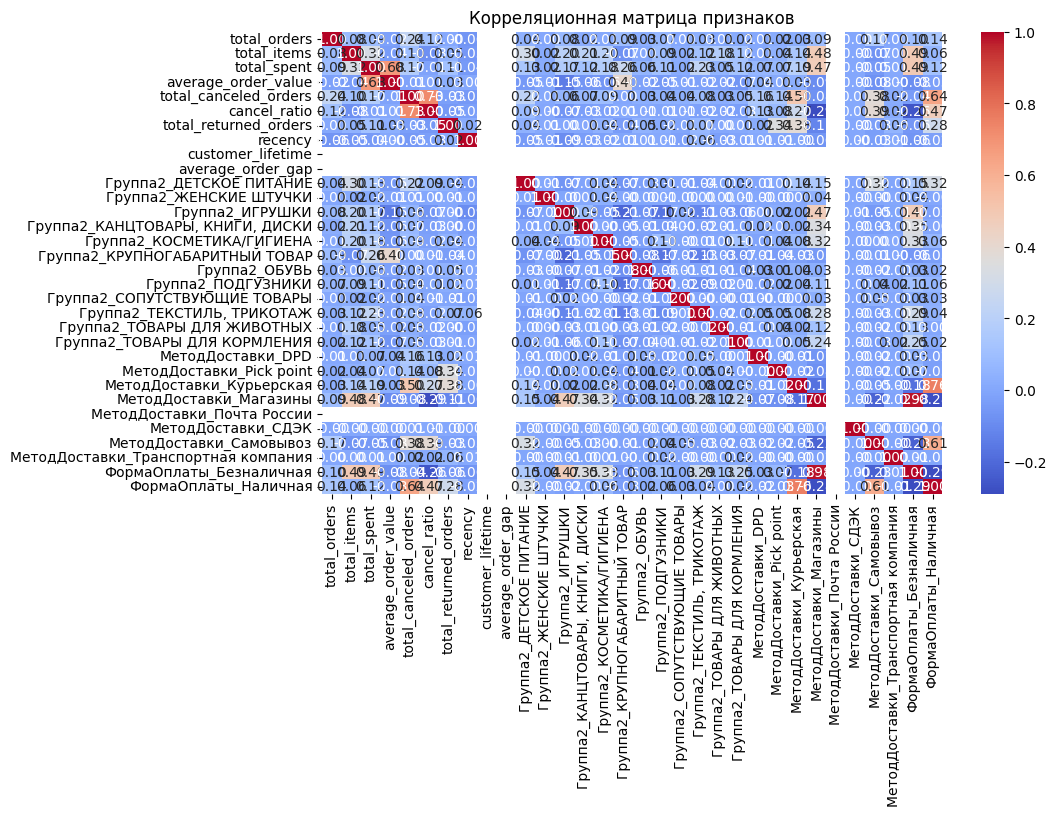

In [ ]:
# Оставляем только числовые колонки
numeric_df = df_scaled.select_dtypes(include=['float64', 'int64'])

# Корреляционная матрица
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()



## Изучаем количество заказов на покупателя в определенный период

In [ ]:
def calculate_orders(df, days_start, days_end):
    date_filter = (df['ДатаЗаказаНаСайте'] >= current_date - pd.Timedelta(days=days_end)) & \
                  (df['ДатаЗаказаНаСайте'] < current_date - pd.Timedelta(days=days_start))
    return df[date_filter].groupby('Телефон_new')['НомерЗаказаНаСайте'].count().rename(
        f'orders_{days_start}_{days_end}_days'
    )

In [ ]:
avg_orders_total = valid_orders.groupby('Телефон_new')['НомерЗаказаНаСайте'].count().rename('total_orders')
avg_orders_0_30 = calculate_orders(valid_orders, 0, 30)
avg_orders_30_60 = calculate_orders(valid_orders, 30, 60)
avg_orders_60_90 = calculate_orders(valid_orders, 60, 90)

customer_orders = pd.concat([avg_orders_total, avg_orders_0_30, avg_orders_30_60, avg_orders_60_90], axis=1).fillna(0)
customer_orders

,total_orders,orders_0_30_days,orders_30_60_days,orders_60_90_days
Телефон_new,,,,
52575752-48575755535143,1,0.0,1.0,0.0
52575753-53554951485345,1,1.0,0.0,0.0
55494857-56565648575674,1,1.0,0.0,0.0
55494949-49494949494971,117,35.0,82.0,0.0
55495051-52535455555679,2,0.0,2.0,0.0
...,...,...,...,...
57545155-53534948485092,1,0.0,1.0,0.0
57555554-50515456504890,1,0.0,1.0,0.0
57565349-48535553555395,1,1.0,0.0,0.0


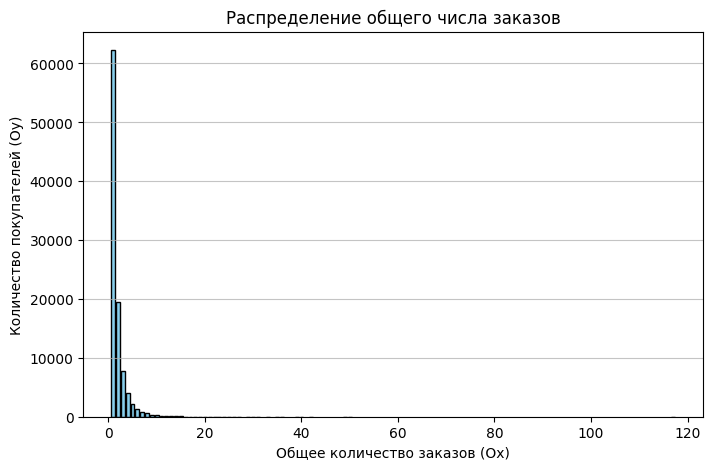

In [ ]:
order_distribution = customer_orders['total_orders'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(order_distribution.index, order_distribution.values, color='skyblue', edgecolor='black')
plt.title('Распределение общего числа заказов')
plt.xlabel('Общее количество заказов (Ox)')
plt.ylabel('Количество покупателей (Oy)')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
customer_orders.describe()

,total_orders,orders_0_30_days,orders_30_60_days,orders_60_90_days
count,99401.000000,99401.000000,99401.000000,99401.000000
mean,1.839086,0.848291,0.962244,0.000111
std,1.784313,0.947093,1.475151,0.010519
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,1.000000,0.000000
max,117.000000,35.000000,82.000000,1.000000


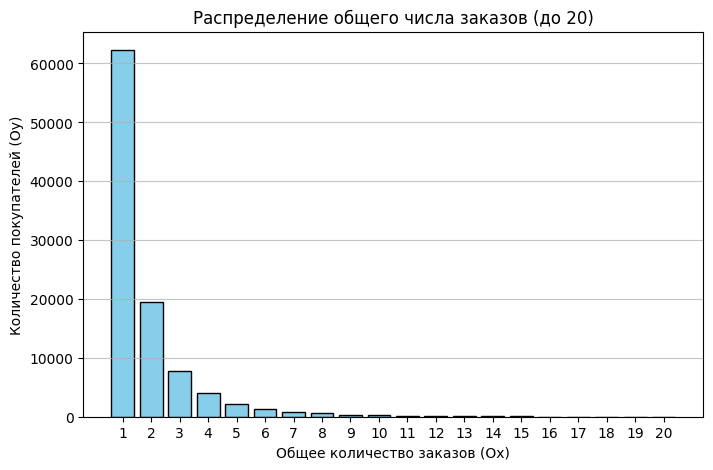

In [ ]:
order_distribution_limited = order_distribution[order_distribution.index <= 20]

plt.figure(figsize=(8, 5))
plt.bar(order_distribution_limited.index, order_distribution_limited.values, color='skyblue', edgecolor='black')
plt.title('Распределение общего числа заказов (до 20)')
plt.xlabel('Общее количество заказов (Ox)')
plt.ylabel('Количество покупателей (Oy)')
plt.xticks(range(1, 21))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
df_more_than_one_order = customer_orders[customer_orders['total_orders'] > 1].reset_index()
df_more_than_one_order = df_more_than_one_order[['Телефон_new', 'total_orders', 'orders_0_30_days', 'orders_30_60_days', 'orders_60_90_days']]
df_more_than_one_order



,Телефон_new,total_orders,orders_0_30_days,orders_30_60_days,orders_60_90_days
0,55494949-49494949494971,117,35.0,82.0,0.0
1,55495051-52535455555679,2,0.0,2.0,0.0
2,55495051-52535455565770,35,2.0,33.0,0.0
3,55515749-57565552545375,2,2.0,0.0,0.0
4,55525753-50535655495477,2,2.0,0.0,0.0
...,...,...,...,...,...
37146,56574851-54535254535286,2,0.0,2.0,0.0
37147,56575450-57505557534889,2,1.0,1.0,0.0
37148,56575655-52525750505484,2,0.0,2.0,0.0
37149,57495351-57485551495294,3,0.0,3.0,0.0


## Изучаем сроки между покупками?

In [ ]:
df_sorted = df17[['Телефон_new', 'НомерЗаказаНаСайте', 'ДатаЗаказаНаСайте']]
df_sorted = df_sorted[df_sorted['Телефон_new'].isin(df_more_than_one_order['Телефон_new'])].sort_values(by=['Телефон_new', 'ДатаЗаказаНаСайте'])
df_sorted = df_sorted.drop_duplicates(subset=['Телефон_new', 'НомерЗаказаНаСайте', 'ДатаЗаказаНаСайте'])
df_sorted


,Телефон_new,НомерЗаказаНаСайте,ДатаЗаказаНаСайте
117054,55494949-49494949494971,3632347_TR,2017-01-01
117074,55494949-49494949494971,3632383_TR,2017-01-01
117076,55494949-49494949494971,3632395_TR,2017-01-01
117084,55494949-49494949494971,3632359_TR,2017-01-01
117087,55494949-49494949494971,3632377_TR,2017-01-01
...,...,...,...
109609,56575450-57505557534889,3622821_TR,2017-01-24
110624,56575450-57505557534889,3623673_TR,2017-01-25
113207,56575450-57505557534889,3623523_TR,2017-01-29
235282,57505754-52565350494991,3732361_TR,2017-01-25


In [ ]:
df_sorted['days_between_orders'] = df_sorted.groupby('Телефон_new')['ДатаЗаказаНаСайте'].diff().dt.days

median_days_per_customer = df_sorted.groupby('Телефон_new')['days_between_orders'].median().dropna()


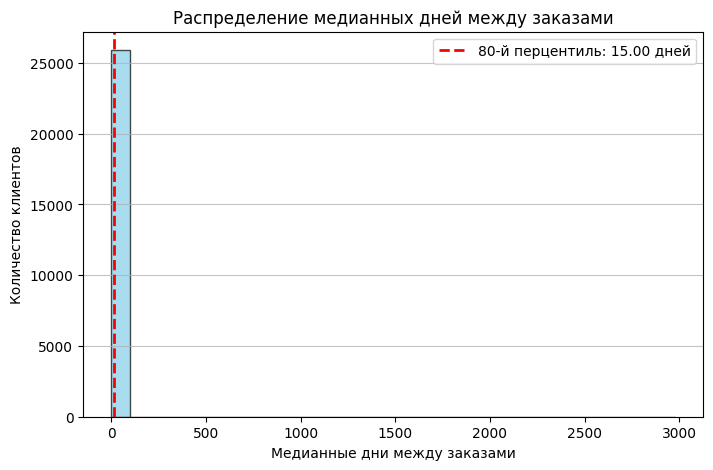

In [ ]:
percentile_80 = median_days_per_customer.quantile(0.8)

plt.figure(figsize=(8, 5))
plt.hist(median_days_per_customer, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(percentile_80, color='red', linestyle='dashed', linewidth=2, label=f'80-й перцентиль: {percentile_80:.2f} дней')
plt.title('Распределение медианных дней между заказами')
plt.xlabel('Медианные дни между заказами')
plt.ylabel('Количество клиентов')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

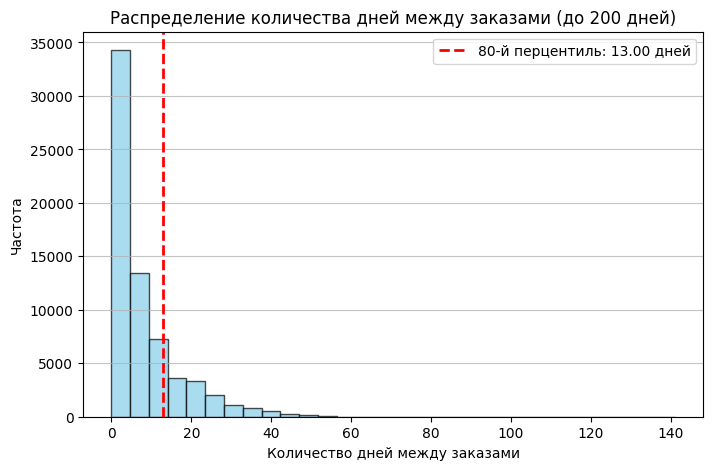

In [ ]:
df_sorted['days_between_orders'] = df_sorted['days_between_orders'][df_sorted['days_between_orders'] <= 200]

# Убираем пропущенные значения после ограничения
days_between_orders_limited = df_sorted['days_between_orders'].dropna()

# Рассчитываем 80-й перцентиль
percentile_80_limited = days_between_orders_limited.quantile(0.8)

# Построение графика распределения
plt.figure(figsize=(8, 5))
plt.hist(days_between_orders_limited, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(percentile_80_limited, color='red', linestyle='dashed', linewidth=2, label=f'80-й перцентиль: {percentile_80_limited:.2f} дней')
plt.title('Распределение количества дней между заказами (до 200 дней)')
plt.xlabel('Количество дней между заказами')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Study the patterns of customer behavior, dates [2017-01-01, 2017-11-30]


In [61]:
files = [
    "other_data/!01_02_17_VSE.csv",
    "other_data/!03&04_17_VSE.csv",
    "other_data/!05&06_17_VSE.csv",
    "other_data/!07&08_17_VSE.csv",
    "other_data/!09_10_17_VSE.csv",
    "other_data/!11_17_VSE.csv"
]

**Сколько покупателей считаются сейчас оттоком?**

Будем считать, что покупатель оттек есть он не совершал заказы последние 90 дней

## How has the distribution of sales changed over time?

In [62]:
all_data = []

for file in files:

    print(f"Processing file: {file}")
    temp = pd.read_csv(file, sep=';', encoding='cp1251', decimal=',', usecols=['ДатаЗаказаНаСайте', 'Статус', 'НомерЗаказаНаСайте'])

    temp['ДатаЗаказаНаСайте'] = pd.to_datetime(temp['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')

    temp = temp[temp['ДатаЗаказаНаСайте'] >= '2017-01-01']

    temp = temp[temp['Статус'] == 'Доставлен']

    temp = temp.drop_duplicates()
    
    all_data.append(temp)

Processing file: other_data/!01_02_17_VSE.csv
Processing file: other_data/!03&04_17_VSE.csv
Processing file: other_data/!05&06_17_VSE.csv
Processing file: other_data/!07&08_17_VSE.csv
Processing file: other_data/!09_10_17_VSE.csv
Processing file: other_data/!11_17_VSE.csv


In [60]:
final_df = pd.concat(all_data, ignore_index=True)

In [63]:
final_df

,НомерЗаказаНаСайте,Статус,ДатаЗаказаНаСайте
0,3999117_TR,Доставлен,2017-03-01
1,3999122_TR,Доставлен,2017-03-01
2,3999363_TR,Доставлен,2017-03-01
3,3999411_TR,Доставлен,2017-03-01
4,3999682_TR,Доставлен,2017-03-01
...,...,...,...
235791,4931969_TR,Доставлен,2017-06-19
235792,4932989_TR,Доставлен,2017-06-19
235793,4935047_TR,Доставлен,2017-06-19
235794,1870001280_TR,Доставлен,2017-06-25


In [ ]:
delivered_orders_count_by_date = final_df.groupby('ДатаЗаказаНаСайте')['НомерЗаказаНаСайте'].nunique()
delivered_orders_mean_by_week = final_df.resample('W', on='ДатаЗаказаНаСайте')['НомерЗаказаНаСайте'].nunique() / 7

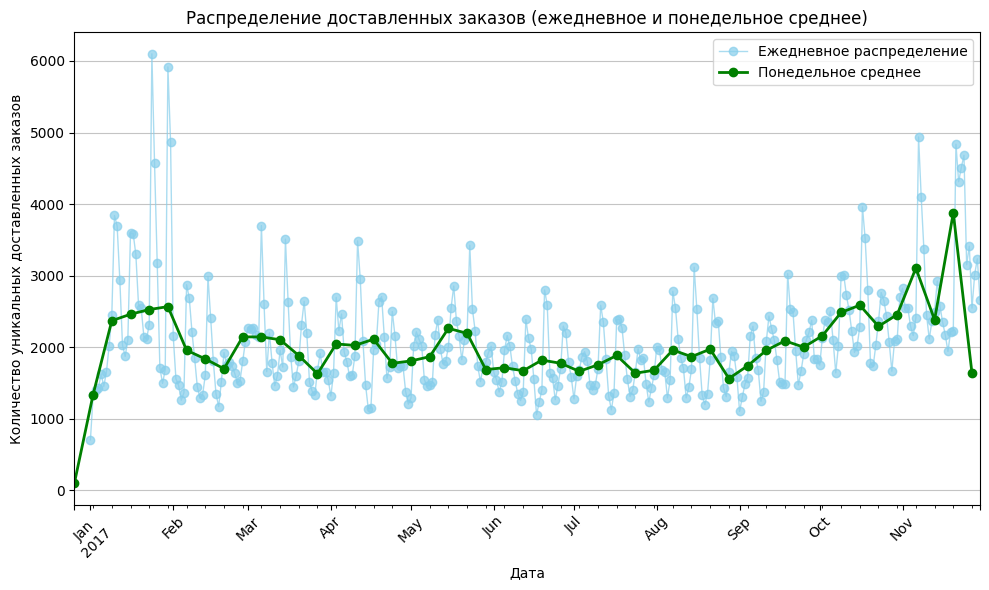

In [ ]:
plt.figure(figsize=(10, 6))

delivered_orders_count_by_date.plot(kind='line', marker='o', color='skyblue', linewidth=1, alpha=0.7, label='Ежедневное распределение')
delivered_orders_mean_by_week.plot(kind='line', marker='o', color='green', linewidth=2, label='Понедельное среднее')

plt.title('Распределение доставленных заказов (ежедневное и понедельное среднее)')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных доставленных заказов')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Study the number of orders per customer in a certain period

In [ ]:
current_date = temp['ДатаЗаказаНаСайте'].max()
all_customer_orders = []

for file in files:
    print(f"Processing file: {file}")
    
    temp = pd.read_csv(file, sep=';', encoding='cp1251', decimal=',', usecols=['ДатаЗаказаНаСайте', 'Телефон_new', 'НомерЗаказаНаСайте', 'Статус'])
    
    temp['ДатаЗаказаНаСайте'] = pd.to_datetime(temp['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')
    temp = temp[temp['Статус'] == 'Доставлен']
    
    temp = temp.dropna(subset=['ДатаЗаказаНаСайте'])

    all_data.append(temp)


Processing file: other_data/!01_02_17_VSE.csv
Processing file: other_data/!03&04_17_VSE.csv
Processing file: other_data/!05&06_17_VSE.csv
Processing file: other_data/!07&08_17_VSE.csv
Processing file: other_data/!09_10_17_VSE.csv
Processing file: other_data/!11_17_VSE.csv


/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_35291/2950953736.py:7: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file, sep=';', encoding='cp1251', decimal=',', usecols=['ДатаЗаказаНаСайте', 'Телефон_new', 'НомерЗаказаНаСайте', 'Статус'])


In [ ]:
combined_data = pd.concat(all_data, ignore_index=True)
combined_data = combined_data.drop_duplicates()

combined_data = combined_data[combined_data['Телефон_new'].notna() & 
                              (combined_data['Телефон_new'] != '0') & 
                              (combined_data['Телефон_new'] != ' ') & 
                              (combined_data['Телефон_new'].str.contains('-'))]

combined_data


,НомерЗаказаНаСайте,Статус,ДатаЗаказаНаСайте,Телефон_new
698187,3530303_TR,Доставлен,2017-01-01,55574851-55555555555176
698188,3530318_TR,Доставлен,2017-01-02,55575054-56575354545171
698189,3530313_TR,Доставлен,2017-01-02,55575149-50524951545076
698190,3530322_TR,Доставлен,2017-01-02,55575054-49555657564875
698192,3530309_TR,Доставлен,2017-01-02,55574857-54575250515477
...,...,...,...,...
3192732,6006404_TR,Доставлен,2017-11-01,55575048-48514857564975
3192736,6006407_TR,Доставлен,2017-11-01,55575051-52504856565570
3192738,6006410_TR,Доставлен,2017-11-01,55575054-49515548525677
3192743,6006411_TR,Доставлен,2017-11-01,55574953-48535753545775


In [ ]:
current_date = combined_data['ДатаЗаказаНаСайте'].max()

def calculate_orders(df, days_start, days_end):
    date_filter = (df['ДатаЗаказаНаСайте'] >= current_date - pd.Timedelta(days=days_end)) & \
                  (df['ДатаЗаказаНаСайте'] < current_date - pd.Timedelta(days=days_start))
    return df[date_filter].groupby('Телефон_new')['НомерЗаказаНаСайте'].count().rename(
        f'orders_{days_start}_{days_end}_days'
    )


### All customers

In [ ]:
avg_orders_total = combined_data.groupby('Телефон_new')['НомерЗаказаНаСайте'].count().rename('total_orders')
avg_orders_0_30 = calculate_orders(combined_data, 0, 30)
avg_orders_30_60 = calculate_orders(combined_data, 30, 60)
avg_orders_60_90 = calculate_orders(combined_data, 60, 90)

In [ ]:
customer_orders = pd.concat([avg_orders_total, avg_orders_0_30, avg_orders_30_60, avg_orders_60_90], axis=1).fillna(0)
customer_orders

,total_orders,orders_0_30_days,orders_30_60_days,orders_60_90_days
Телефон_new,,,,
32555749-545749525150 .,1,0.0,0.0,0.0
32565748-535549565054 5,1,1.0,0.0,0.0
49574954-56524849545119,1,0.0,0.0,1.0
51534957-48525550515032,1,0.0,0.0,0.0
52575753-53554951485345,1,0.0,0.0,0.0
...,...,...,...,...
57565349-48535553555395,1,0.0,0.0,0.0
57565349-55535352575597,1,0.0,0.0,0.0
57565350-49485256515193,1,0.0,1.0,0.0


In [ ]:
customer_orders.describe()

,total_orders,orders_0_30_days,orders_30_60_days,orders_60_90_days
count,321025.000000,321025.000000,321025.000000,321025.000000
mean,1.894332,0.222447,0.178291,0.170865
std,2.299614,0.519326,0.461260,0.453250
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000
max,125.000000,25.000000,25.000000,13.000000


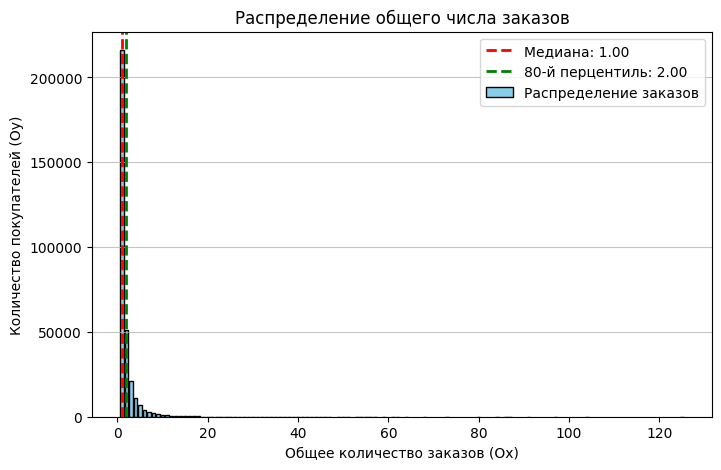

In [ ]:
med = customer_orders['total_orders'].quantile(0.5)
percentile_80 = customer_orders['total_orders'].quantile(0.8)

plt.figure(figsize=(8, 5))
plt.bar(order_distribution.index, order_distribution.values, color='skyblue', edgecolor='black', label='Распределение заказов')

plt.axvline(med, color='red', linestyle='dashed', linewidth=2, label=f'Медиана: {med:.2f}')
plt.axvline(percentile_80, color='green', linestyle='dashed', linewidth=2, label=f'80-й перцентиль: {percentile_80:.2f}')

plt.title('Распределение общего числа заказов')
plt.xlabel('Общее количество заказов (Ox)')
plt.ylabel('Количество покупателей (Oy)')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

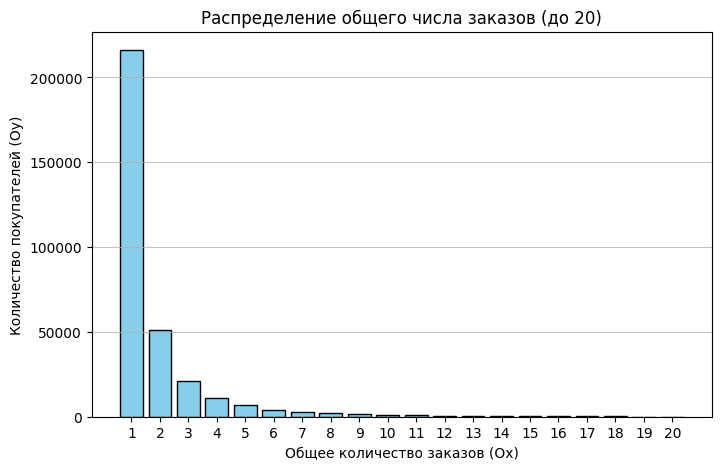

In [ ]:
order_distribution_limited = order_distribution[order_distribution.index <= 20]

plt.figure(figsize=(8, 5))
plt.bar(order_distribution_limited.index, order_distribution_limited.values, color='skyblue', edgecolor='black')
plt.title('Распределение общего числа заказов (до 20)')
plt.xlabel('Общее количество заказов (Ox)')
plt.ylabel('Количество покупателей (Oy)')
plt.xticks(range(1, 21))
plt.grid(axis='y', alpha=0.75)
plt.show()


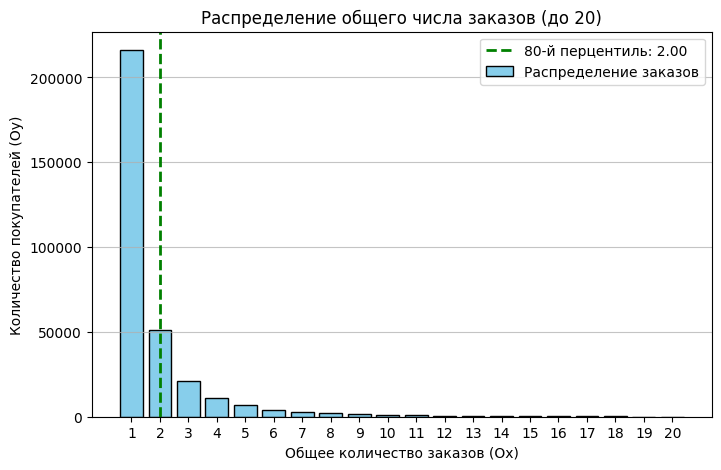

In [ ]:
percentile_80 = customer_orders['total_orders'].quantile(0.8)

order_distribution_limited = order_distribution[order_distribution.index <= 20]

plt.figure(figsize=(8, 5))
plt.bar(order_distribution_limited.index, order_distribution_limited.values, color='skyblue', edgecolor='black', label='Распределение заказов')

plt.axvline(percentile_80, color='green', linestyle='dashed', linewidth=2, label=f'80-й перцентиль: {percentile_80:.2f}')

plt.title('Распределение общего числа заказов (до 20)')
plt.xlabel('Общее количество заказов (Ox)')
plt.ylabel('Количество покупателей (Oy)')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


### At least 2 purchases

In [ ]:
df_more_than_one_order = customer_orders[customer_orders['total_orders'] > 1].reset_index()
df_more_than_one_order = df_more_than_one_order[['Телефон_new', 'total_orders', 'orders_0_30_days', 'orders_30_60_days', 'orders_60_90_days']]
df_more_than_one_order

,Телефон_new,total_orders,orders_0_30_days,orders_30_60_days,orders_60_90_days
0,55525753-53565350484974,2,0.0,0.0,0.0
1,55525753-55534957495174,2,1.0,0.0,0.0
2,55525753-55555057565276,6,0.0,0.0,0.0
3,55525753-57524855525273,3,1.0,1.0,1.0
4,55525757-57525150545178,5,0.0,3.0,0.0
...,...,...,...,...,...
105025,55575757-57575751494871,2,0.0,0.0,0.0
105026,55575757-57575752575379,2,0.0,0.0,0.0
105027,55575757-57575753534870,7,1.0,0.0,3.0
105028,56575655-52525750505484,6,0.0,0.0,0.0


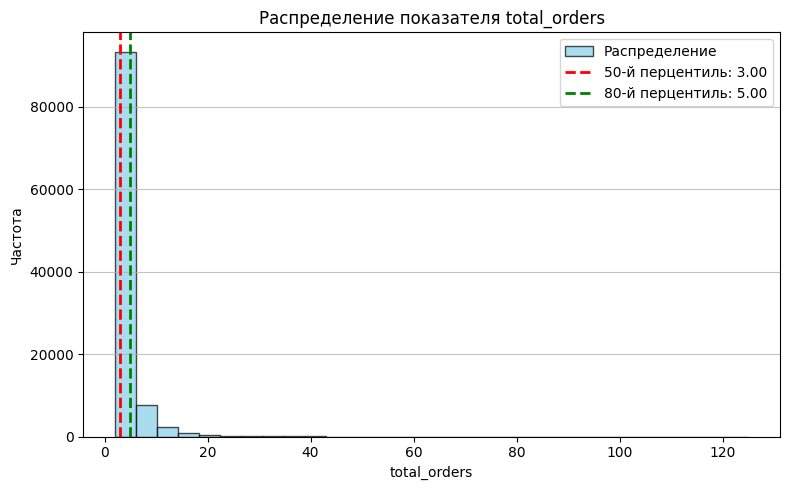

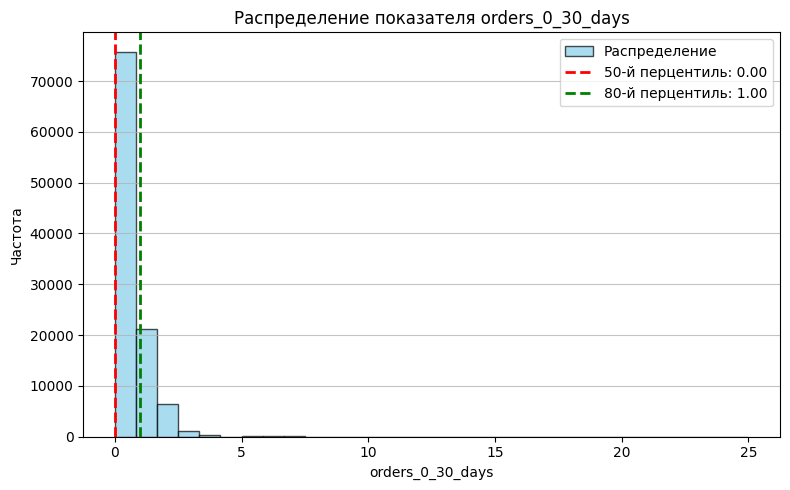

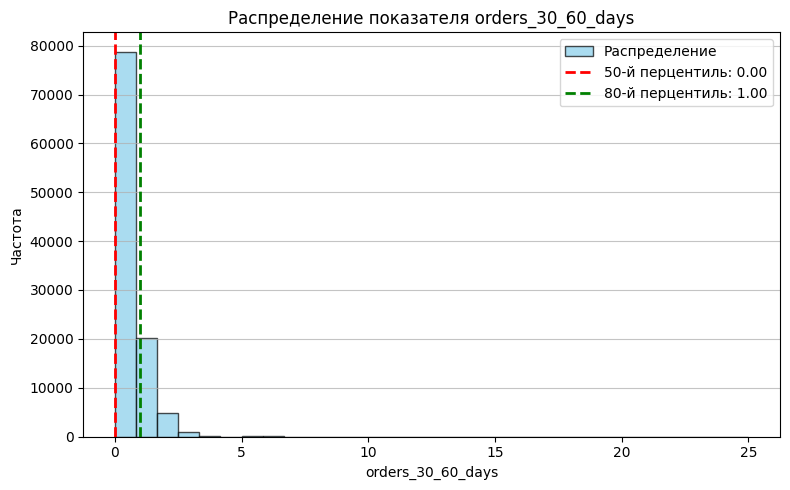

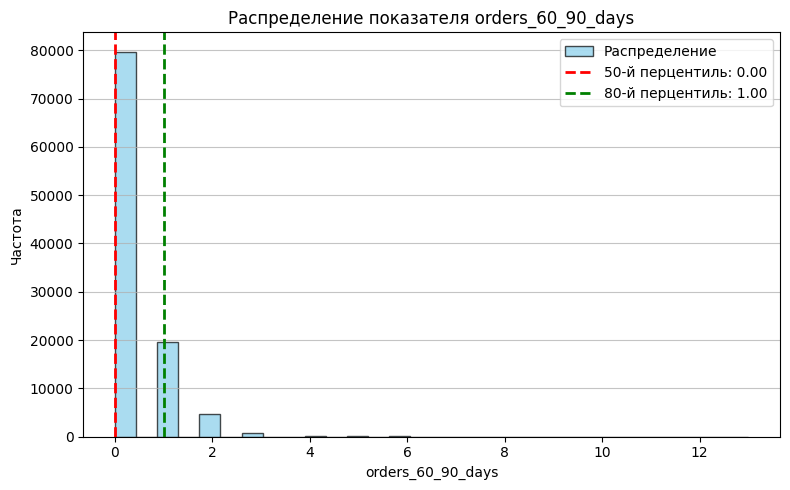

In [ ]:
columns_to_plot = ['total_orders', 'orders_0_30_days', 'orders_30_60_days', 'orders_60_90_days']

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    
    distribution = df_more_than_one_order[column]

    med = distribution.quantile(0.5)
    percentile_80 = distribution.quantile(0.8)
    
    plt.hist(distribution, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Распределение')
    
    plt.axvline(med, color='red', linestyle='dashed', linewidth=2, label=f'50-й перцентиль: {med:.2f}')
    plt.axvline(percentile_80, color='green', linestyle='dashed', linewidth=2, label=f'80-й перцентиль: {percentile_80:.2f}')
    
    plt.title(f'Распределение показателя {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


# Собираем датасет за 4 месяца (март-июнь) для Кластеризации покупателей 

In [ ]:
files = [
    "other_data/!03&04_17_VSE.csv",
    "other_data/!05&06_17_VSE.csv"
]

all_data = []

for file in files:

    print(f"Processing file: {file}")
    temp = pd.read_csv(file, sep=';', encoding='cp1251', decimal=',')

    temp['ДатаЗаказаНаСайте'] = pd.to_datetime(temp['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')

    temp = temp[temp['ДатаЗаказаНаСайте'] >= '2017-01-01']

    temp = temp[temp['Статус'] == 'Доставлен']

    temp = temp.drop_duplicates()
    
    all_data.append(temp)


Processing file: other_data/!03&04_17_VSE.csv
Processing file: other_data/!05&06_17_VSE.csv


In [ ]:
final_data = pd.concat(all_data, ignore_index=True)
final_data = final_data.drop_duplicates()

final_data = final_data[final_data['Телефон_new'].notna() & 
                        (final_data['Телефон_new'] != '0') & 
                        (final_data['Телефон_new'] != ' ') & 
                        (final_data['Телефон_new'].str.contains('-'))]

final_data

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,2017-03-01,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
1,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,2017-03-01,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
2,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,2017-03-01,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
3,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,2017-03-01,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
4,01.03.2017 12:19,07.03.2017 0:00,3999682_TR,К отгрузке,2 962,2 962,Курьерская,Наличная,Москва,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,ИГРУШКИ,"LEGO Duplo, КОНСТРУКТОР Лошадки, (20 дет.)",МГТ,Нет,NaN,1,719,719,"668,6",3,2 017,NaN,Доставлен,Москва,"50,4",0,0,3,1,2017-03-01,55574851-53495753545674,97117_au30@yandex.ru,Мария,IDL00026934452,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971875,30.06.2017 22:55,04.07.2017 0:00,5031477_TR,Доставлен,3 416,3 416,Магазины,Безналичная,Москва,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре овощные,ППКП,"СЭМПЕР, ПЮРЕ цукини, с 4-х мес., (125 г)",МГТ,Нет,NaN,7,70,490,"58,96",6,2 017,23111,Доставлен,Москва,"77,28",49,49,8,7,2017-06-30,55574857-57485151544876,107117_ku13@mail.ru,Наталия,IDL00007784452,0,NaN
971876,30.06.2017 22:55,04.07.2017 0:00,5031477_TR,Доставлен,3 416,3 416,Магазины,Безналичная,Москва,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре мясные,ППКП,"СЭМПЕР, ПЮРЕ телятина, (мономясо), с 6 мес., (...",МГТ,Нет,NaN,2,99,198,"98,5",6,2 017,23111,Доставлен,Москва,1,49,49,6,2,2017-06-30,55574857-57485151544876,107117_ku13@mail.ru,Наталия,IDL00017315452,0,NaN
971877,30.06.2017 23:13,11.07.2017 0:00,5031575_TR,К отгрузке,6 690,6 690,Pick point,Безналичная,Санкт-Петербург,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,ОДЕЖДА,"BEMBI, ФУТБОЛКА (бел), р.128",МГТ,Нет,NaN,1,199,199,96,6,2 017,NaN,Доставлен,Регионы,103,370,370,1,1,2017-06-30,55575348-48504953555074,117117_uu16@yandex.ru,Гость,IDL00051785149,0,NaN
971878,30.06.2017 23:58,06.07.2017 0:00,5031783_TR,Доставлен,2 819,2 819,Магазины,Безналичная,Нижний Новгород,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре ассорти,ППКП,"ХИПП, ПЮРЕ каша груша-зерновые хлопья, с 4 мес...",МГТ,Нет,NaN,4,84,336,"83,9",6,2 017,GL0285876,Доставлен,Регионы,"0,4",99,99,2,4,2017-06-30,55575450-53495456535575,121109_ym20@gmail.com,Мария,ID000sm-0652654,0,NaN


In [ ]:
current_date = final_data['ДатаЗаказаНаСайте'].max()

final_data['ДатаЗаказаНаСайте'] = pd.to_datetime(final_data['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')

In [ ]:
def calculate_orders_period(df, days_start, days_end):
    date_filter = (df['ДатаЗаказаНаСайте'] >= current_date - pd.Timedelta(days=days_end)) & \
                  (df['ДатаЗаказаНаСайте'] < current_date - pd.Timedelta(days=days_start))
    return df[date_filter].groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique()


In [ ]:
# Основные метрики

customer_features = final_data.groupby('Телефон_new').agg(
    total_orders=('НомерЗаказаНаСайте', 'nunique'),   
    last_order_date=('ДатаЗаказаНаСайте', 'max'),     
    total_returns=('Статус', lambda x: (x == 'Возврат').sum()),  
    total_cancellations=('Статус', lambda x: (x == 'Отменен').sum()), 
    unique_sku=('ID_SKU', 'nunique')                
).reset_index()

customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku
0,32555749-545749525150 .,1,2017-04-07,0,0,6
1,55494851-56495152535476,1,2017-03-22,0,0,1
2,55505353-48575248535072,1,2017-03-09,0,0,1
3,55515251-50565653525572,1,2017-06-14,0,0,3
4,55515349-57485148505273,1,2017-05-20,0,0,1
...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4
150906,57555148-48484848484890,1,2017-06-26,0,0,2
150907,57555557-52515150525092,1,2017-05-07,0,0,16
150908,57565349-55535352575597,1,2017-06-13,0,0,2


In [ ]:
# Ззказы за временные периоды

customer_features = customer_features.merge(
    calculate_orders_period(final_data, 0, 30).rename('orders_0_30_days'), on='Телефон_new', how='left'
).merge(
    calculate_orders_period(final_data, 30, 60).rename('orders_30_60_days'), on='Телефон_new', how='left'
).merge(
    calculate_orders_period(final_data, 60, 90).rename('orders_60_90_days'), on='Телефон_new', how='left'
)

customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days
0,32555749-545749525150 .,1,2017-04-07,0,0,6,NaN,NaN,1.0
1,55494851-56495152535476,1,2017-03-22,0,0,1,NaN,NaN,NaN
2,55505353-48575248535072,1,2017-03-09,0,0,1,NaN,NaN,NaN
3,55515251-50565653525572,1,2017-06-14,0,0,3,1.0,NaN,NaN
4,55515349-57485148505273,1,2017-05-20,0,0,1,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4,NaN,NaN,NaN
150906,57555148-48484848484890,1,2017-06-26,0,0,2,1.0,NaN,NaN
150907,57555557-52515150525092,1,2017-05-07,0,0,16,NaN,1.0,NaN
150908,57565349-55535352575597,1,2017-06-13,0,0,2,1.0,NaN,NaN


In [ ]:
# Среднее и медианное время между заказами
final_data['days_between_orders'] = final_data.groupby('Телефон_new')['ДатаЗаказаНаСайте'].diff().dt.days
median_days = final_data.groupby('Телефон_new')['days_between_orders'].median().rename('median_days_between_orders')
mean_days = final_data.groupby('Телефон_new')['days_between_orders'].mean().rename('mean_days_between_orders')
customer_features = customer_features.merge(median_days, on='Телефон_new', how='left')
customer_features = customer_features.merge(mean_days, on='Телефон_new', how='left')

customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders
0,32555749-545749525150 .,1,2017-04-07,0,0,6,NaN,NaN,1.0,0.0,0.0
1,55494851-56495152535476,1,2017-03-22,0,0,1,NaN,NaN,NaN,NaN,NaN
2,55505353-48575248535072,1,2017-03-09,0,0,1,NaN,NaN,NaN,NaN,NaN
3,55515251-50565653525572,1,2017-06-14,0,0,3,1.0,NaN,NaN,0.0,0.0
4,55515349-57485148505273,1,2017-05-20,0,0,1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4,NaN,NaN,NaN,0.0,0.0
150906,57555148-48484848484890,1,2017-06-26,0,0,2,1.0,NaN,NaN,0.0,0.0
150907,57555557-52515150525092,1,2017-05-07,0,0,16,NaN,1.0,NaN,0.0,0.0
150908,57565349-55535352575597,1,2017-06-13,0,0,2,1.0,NaN,NaN,0.0,0.0


In [ ]:
# Доля возвратов и отмен
customer_features['return_ratio'] = customer_features['total_returns'] / customer_features['total_orders']
customer_features['cancellation_ratio'] = customer_features['total_cancellations'] / customer_features['total_orders']

customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio
0,32555749-545749525150 .,1,2017-04-07,0,0,6,NaN,NaN,1.0,0.0,0.0,0.0,0.0
1,55494851-56495152535476,1,2017-03-22,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,55505353-48575248535072,1,2017-03-09,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,55515251-50565653525572,1,2017-06-14,0,0,3,1.0,NaN,NaN,0.0,0.0,0.0,0.0
4,55515349-57485148505273,1,2017-05-20,0,0,1,NaN,1.0,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4,NaN,NaN,NaN,0.0,0.0,0.0,0.0
150906,57555148-48484848484890,1,2017-06-26,0,0,2,1.0,NaN,NaN,0.0,0.0,0.0,0.0
150907,57555557-52515150525092,1,2017-05-07,0,0,16,NaN,1.0,NaN,0.0,0.0,0.0,0.0
150908,57565349-55535352575597,1,2017-06-13,0,0,2,1.0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
# Покупки низко- и высоко-частотных товаров
sku_frequency = final_data['ID_SKU'].value_counts()
low_freq_skus = sku_frequency[sku_frequency < sku_frequency.median()].index
high_freq_skus = sku_frequency[sku_frequency >= sku_frequency.median()].index
customer_features['low_freq_purchases'] = final_data[final_data['ID_SKU'].isin(low_freq_skus)].groupby('Телефон_new')['ID_SKU'].count()
customer_features['high_freq_purchases'] = final_data[final_data['ID_SKU'].isin(high_freq_skus)].groupby('Телефон_new')['ID_SKU'].count()

customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio,low_freq_purchases,high_freq_purchases
0,32555749-545749525150 .,1,2017-04-07,0,0,6,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN
1,55494851-56495152535476,1,2017-03-22,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,55505353-48575248535072,1,2017-03-09,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,55515251-50565653525572,1,2017-06-14,0,0,3,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
4,55515349-57485148505273,1,2017-05-20,0,0,1,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
150906,57555148-48484848484890,1,2017-06-26,0,0,2,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
150907,57555557-52515150525092,1,2017-05-07,0,0,16,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
150908,57565349-55535352575597,1,2017-06-13,0,0,2,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
# Покупки по категориям товаров
group2_features = final_data.groupby(['Телефон_new', 'Группа2']).size().unstack(fill_value=0)
customer_features = customer_features.merge(group2_features, on='Телефон_new', how='left')

customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio,low_freq_purchases,high_freq_purchases,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,32555749-545749525150 .,1,2017-04-07,0,0,6,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,5,0,0,0,0,0,0,0,0,0
1,55494851-56495152535476,1,2017-03-22,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0
2,55505353-48575248535072,1,2017-03-09,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1
3,55515251-50565653525572,1,2017-06-14,0,0,3,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0
4,55515349-57485148505273,1,2017-05-20,0,0,1,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,2,1,0,0,0,0,0,0
150906,57555148-48484848484890,1,2017-06-26,0,0,2,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0
150907,57555557-52515150525092,1,2017-05-07,0,0,16,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,15,0,0,0
150908,57565349-55535352575597,1,2017-06-13,0,0,2,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
customer_features = customer_features.fillna(0)
customer_features

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio,low_freq_purchases,high_freq_purchases,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,32555749-545749525150 .,1,2017-04-07,0,0,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,5,0,0,0,0,0,0,0,0,0
1,55494851-56495152535476,1,2017-03-22,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,55505353-48575248535072,1,2017-03-09,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,55515251-50565653525572,1,2017-06-14,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,55515349-57485148505273,1,2017-05-20,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150905,57545657-49575257555799,1,2017-03-24,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2,1,0,0,0,0,0,0
150906,57555148-48484848484890,1,2017-06-26,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0
150907,57555557-52515150525092,1,2017-05-07,0,0,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,15,0,0,0
150908,57565349-55535352575597,1,2017-06-13,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Оставляем клиентов с количеством заказов >= 2
customer_data = customer_features[customer_features['total_orders'] >= 2]

customer_data.reset_index(drop=True, inplace=True)
customer_data


,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio,low_freq_purchases,high_freq_purchases,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55574848-48494948544878,2,2017-04-05,0,0,11,0.0,0.0,1.0,0.0,1.500000,0.0,0.0,0.0,0.0,0,0,5,0,0,0,0,1,0,5,0,0,0
1,55574848-48495057545270,2,2017-06-09,0,0,19,1.0,0.0,0.0,0.0,5.555556,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,0,15,0,0,0
2,55574848-48504852575373,2,2017-06-13,0,0,2,1.0,1.0,0.0,0.0,4.666667,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,55574848-48504954494976,3,2017-06-24,0,0,1,2.0,1.0,0.0,13.0,13.000000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0
4,55574848-48545256485273,2,2017-03-20,0,0,3,0.0,0.0,0.0,8.0,2.666667,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39706,55575757-57574950495171,3,2017-05-22,0,0,3,0.0,1.0,1.0,0.0,12.600000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0
39707,55575757-57574954555374,2,2017-04-20,0,0,11,0.0,0.0,1.0,0.0,4.454545,0.0,0.0,0.0,0.0,9,0,0,0,0,0,0,2,0,0,0,0,0
39708,55575757-57575751494871,2,2017-05-03,0,0,3,0.0,1.0,1.0,0.0,2.666667,0.0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0
39709,55575757-57575753534870,2,2017-05-25,0,0,1,0.0,2.0,0.0,-21.0,-21.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,0,0,0,0,0


## Clustering 

### old trials

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.select_dtypes(include=['number']))


In [ ]:
sse = []  # Сумма квадратов ошибок
silhouette_scores = []  # Силуэтный коэффициент
inertia_values = []  # Инерция

In [ ]:
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    # SSE (sum of squared errors)
    sse.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Инерция
    inertia_values.append(kmeans.inertia_)

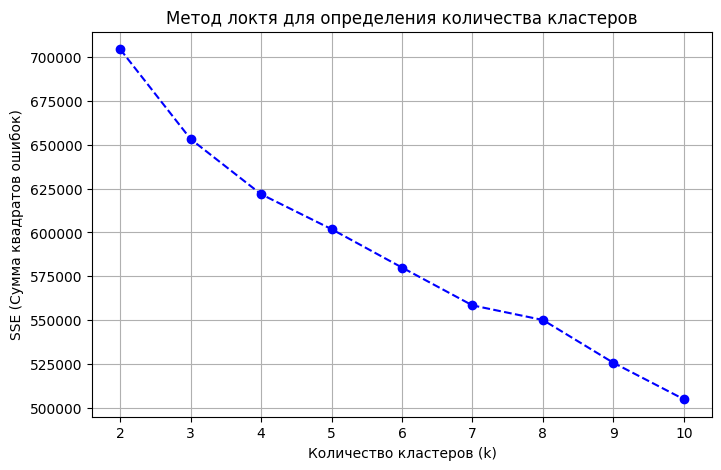

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--', color='b')
plt.title('Метод локтя для определения количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('SSE (Сумма квадратов ошибок)')
plt.grid(True)
plt.show()

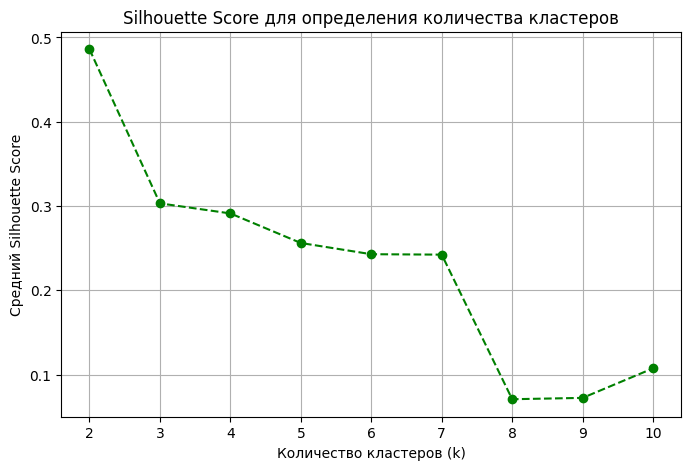

In [ ]:
# Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Score для определения количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Средний Silhouette Score')
plt.grid(True)
plt.show()

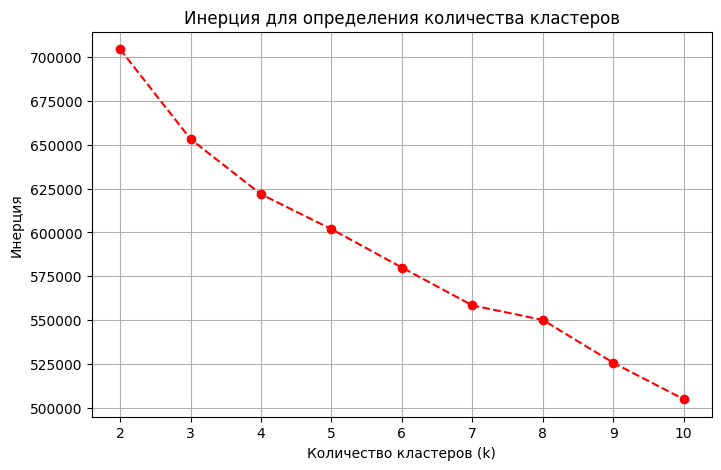

In [ ]:
# Критерий инерции
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='r')
plt.title('Инерция для определения количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

In [ ]:
# Оптимальное количество кластеров из анализа (например, k=4 для KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Применение DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [ ]:
# Проверка распределения кластеров
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
print("Кластеры и их размеры:")
for label, count in zip(unique_labels, counts):
    print(f"Кластер {label}: {count} точек")

Кластеры и их размеры:
Кластер -1: 1559 точек
Кластер 0: 37693 точек
Кластер 1: 351 точек
Кластер 2: 20 точек
Кластер 3: 45 точек
Кластер 4: 13 точек
Кластер 5: 9 точек
Кластер 6: 8 точек
Кластер 7: 5 точек
Кластер 8: 3 точек
Кластер 9: 5 точек


In [ ]:
# Применение PCA для визуализации в 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

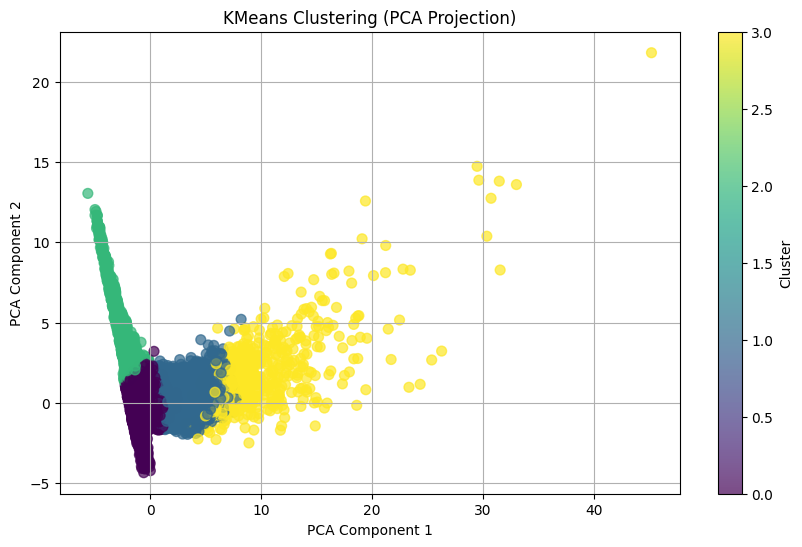

In [ ]:
# Визуализация KMeans
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('KMeans Clustering (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

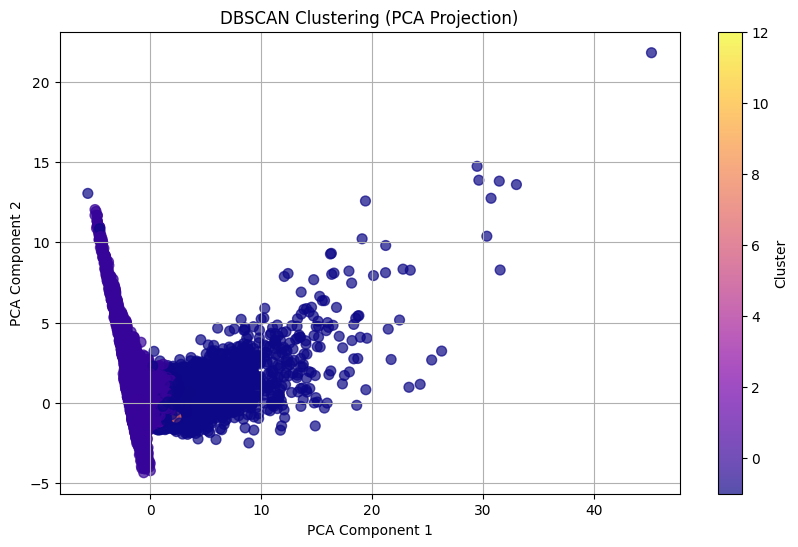

In [ ]:
# Визуализация DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

### Determining the number of clusters
17.02

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.select_dtypes(include=['number']))


In [ ]:
k_range = range(2, 15)

sse = []
silhouette_scores = []
inertia_values = []
dbi_scores = []  # Davies-Bouldin Index
ch_scores = []  # Calinski-Harabasz Index
gap_values = []

random_data = np.random.random_sample(scaled_data.shape)

In [ ]:
# Цикл для расчета метрик
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)
    dbi_scores.append(davies_bouldin_score(scaled_data, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(scaled_data, kmeans.labels_))

    # 📌 Gap Statistics
    random_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(random_data)
    gap_values.append(np.log(np.mean(cdist(random_data, random_kmeans.cluster_centers_, 'euclidean'))) - 
                      np.log(np.mean(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'))))


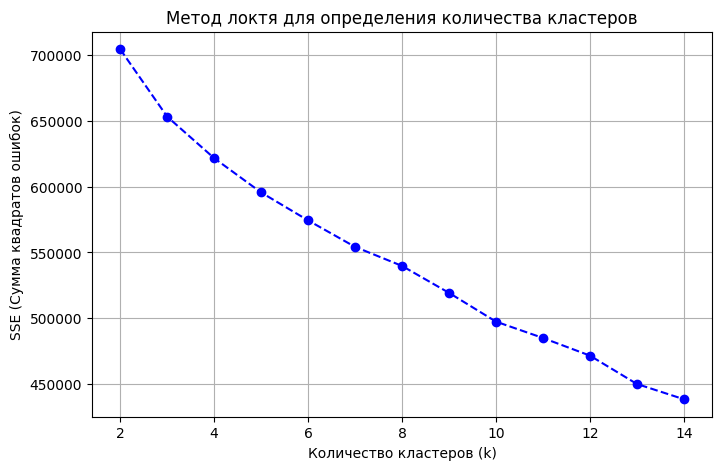

In [ ]:
# Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--', color='b')
plt.title('Метод локтя для определения количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('SSE (Сумма квадратов ошибок)')
plt.grid(True)
plt.show()

Optimal number of clusters: 6-7

Максимальный спад наблюдается между 2 и 3 кластерами. Далее стабильное снижение, но после 6 кластеров резкое ухудшение.

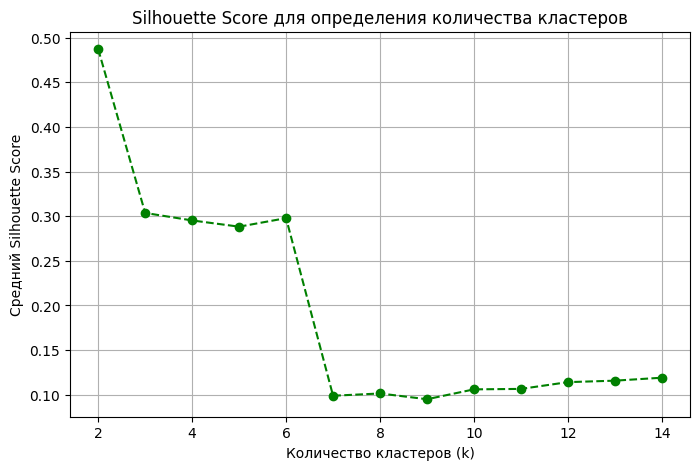

In [ ]:
# Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Score для определения количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Средний Silhouette Score')
plt.grid(True)
plt.show()

Optimal number of clusters: 6 or less

Видно постепенное снижение ошибки без четкого "локтя", но заметное замедление спада после 6-7 кластеров.

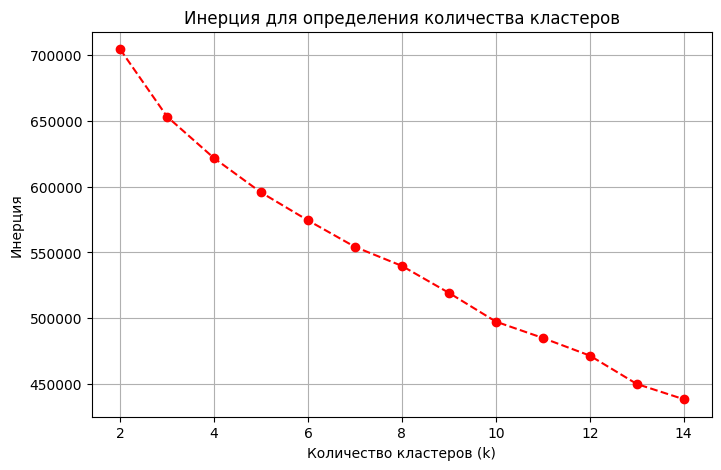

In [ ]:
# Инерция
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='r')
plt.title('Инерция для определения количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


Optimal number of clusters: 6-7

Видно постепенное снижение ошибки без четкого "локтя", но заметное замедление спада после 6-7 кластеров.

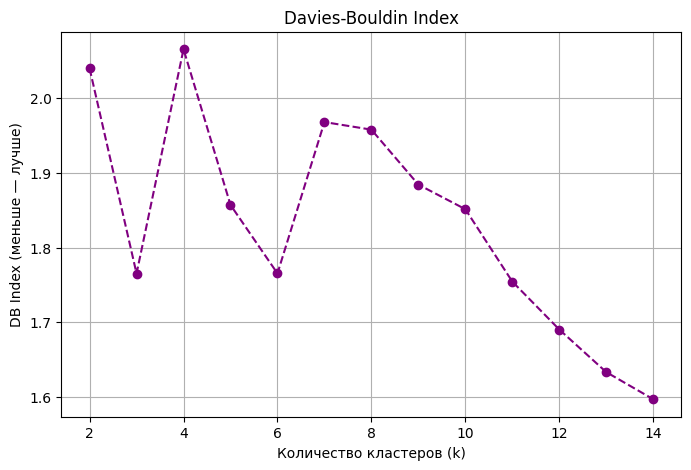

In [ ]:
# Davies-Bouldin Index (чем ниже, тем лучше)
plt.figure(figsize=(8, 5))
plt.plot(k_range, dbi_scores, marker='o', linestyle='--', color='purple')
plt.title('Davies-Bouldin Index')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('DB Index (меньше — лучше)')
plt.grid(True)
plt.show()

Optimal number of clusters: 14

Минимальное значение (лучшее разбиение) достигается при увеличении числа кластеров

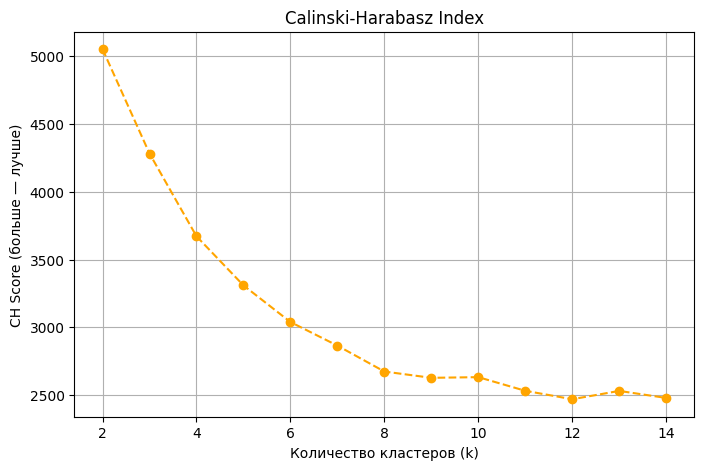

In [ ]:
# Calinski-Harabasz Index (чем выше, тем лучше)
plt.figure(figsize=(8, 5))
plt.plot(k_range, ch_scores, marker='o', linestyle='--', color='orange')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('CH Score (больше — лучше)')
plt.grid(True)
plt.show()

Optimal number of clusters: 6-7

Максимальное значение (лучшее разбиение) также около 6-7 кластеров, затем резкий спад.

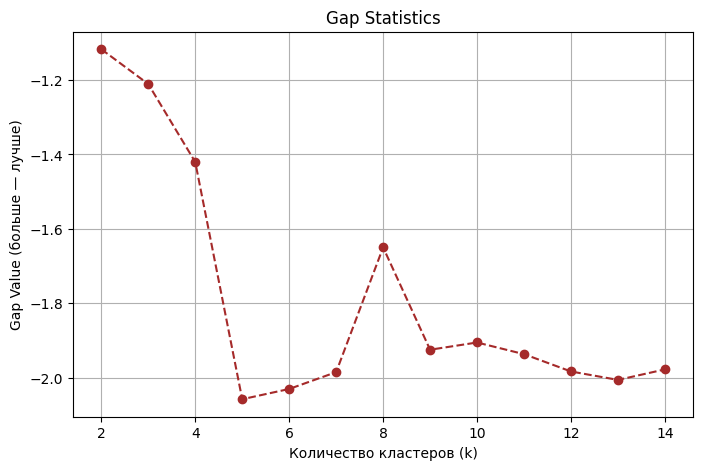

In [ ]:
# Gap Statistics (чем выше, тем лучше)
plt.figure(figsize=(8, 5))
plt.plot(k_range, gap_values, marker='o', linestyle='--', color='brown')
plt.title('Gap Statistics')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Gap Value (больше — лучше)')
plt.grid(True)
plt.show()

Optimal number of clusters: 8

На графике Gap Statistics оптимальное количество кластеров определяется как точка, где метрика достигает локального максимума

### Customer clustering: all methods

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
df_numeric = customer_data.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# pca = PCA(n_components=5)  
# reduced_data = pca.fit_transform(scaled_data)

# agg_clust = AgglomerativeClustering(n_clusters=7, linkage='ward')
# agg_labels = agg_clust.fit_predict(reduced_data)


In [ ]:
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

In [ ]:
# spectral = SpectralClustering(n_clusters=7, random_state=42, assign_labels='kmeans').fit_predict(scaled_data)

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=7, random_state=42).fit_predict(scaled_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
def plot_clusters(cluster_labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='tab10', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

In [ ]:
print(pd.Series(kmeans_labels).value_counts())


0    26963
5     8136
2     2289
3     1525
1      451
4      228
6      119
Name: count, dtype: int64


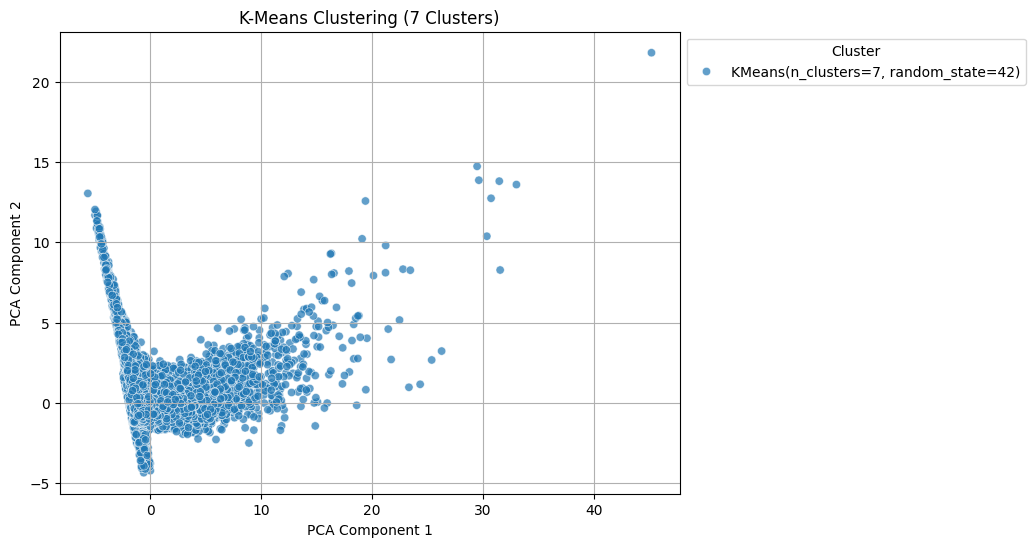

In [ ]:
plot_clusters(kmeans, "K-Means Clustering (7 Clusters)")

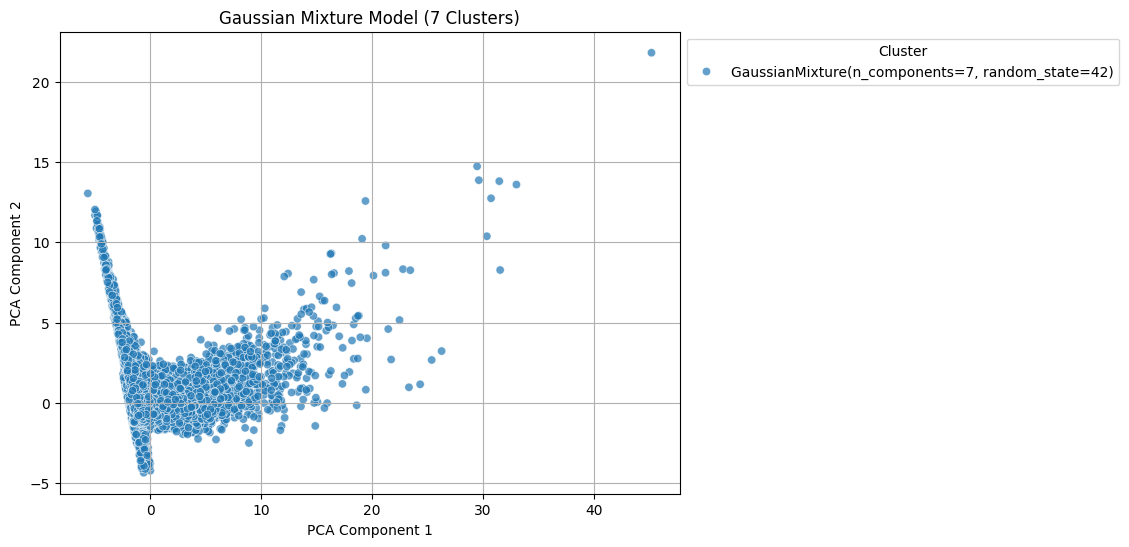

In [ ]:
plot_clusters(gmm, "Gaussian Mixture Model (7 Clusters)")

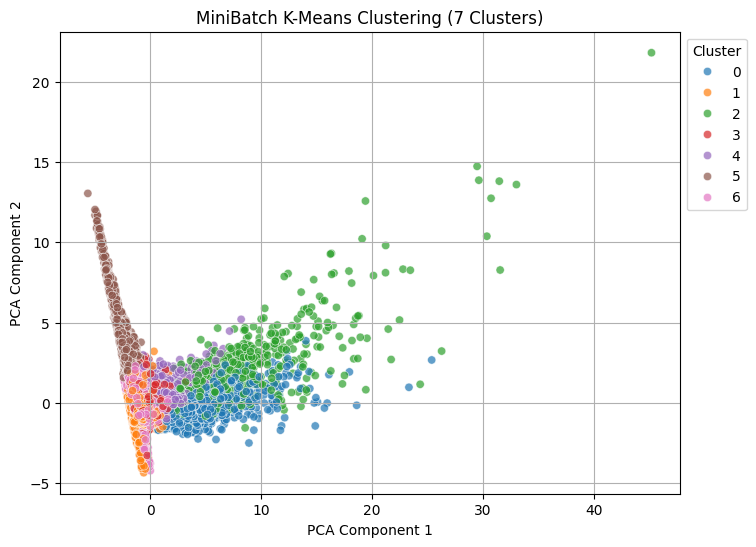

In [ ]:
plot_clusters(minibatch_kmeans, "MiniBatch K-Means Clustering (7 Clusters)")

## Predict Churn


### 1st try

In [ ]:
customer_data

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio,low_freq_purchases,high_freq_purchases,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55574848-48494948544878,2,2017-04-05,0,0,11,0.0,0.0,1.0,0.0,1.500000,0.0,0.0,0.0,0.0,0,0,5,0,0,0,0,1,0,5,0,0,0
1,55574848-48495057545270,2,2017-06-09,0,0,19,1.0,0.0,0.0,0.0,5.555556,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,0,15,0,0,0
2,55574848-48504852575373,2,2017-06-13,0,0,2,1.0,1.0,0.0,0.0,4.666667,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,55574848-48504954494976,3,2017-06-24,0,0,1,2.0,1.0,0.0,13.0,13.000000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0
4,55574848-48545256485273,2,2017-03-20,0,0,3,0.0,0.0,0.0,8.0,2.666667,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39706,55575757-57574950495171,3,2017-05-22,0,0,3,0.0,1.0,1.0,0.0,12.600000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0
39707,55575757-57574954555374,2,2017-04-20,0,0,11,0.0,0.0,1.0,0.0,4.454545,0.0,0.0,0.0,0.0,9,0,0,0,0,0,0,2,0,0,0,0,0
39708,55575757-57575751494871,2,2017-05-03,0,0,3,0.0,1.0,1.0,0.0,2.666667,0.0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0
39709,55575757-57575753534870,2,2017-05-25,0,0,1,0.0,2.0,0.0,-21.0,-21.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [ ]:
current_date = final_data['ДатаЗаказаНаСайте'].max()

# Преобразуем last_order_date в числовой формат (разница в днях от current_date)
customer_data['days_from_last_purchase'] = (current_date - customer_data['last_order_date']).dt.days

customer_data = customer_data.drop(columns=['last_order_date'])

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_66286/1552119290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['days_from_last_purchase'] = (current_date - customer_data['last_order_date']).dt.days


In [ ]:
customer_data['kmeans_cluster'] = kmeans_labels

customer_data['churn'] = np.where(
    (current_date - pd.to_datetime(customer_data['last_order_date'])).dt.days > 60,
    1,  # Отток
    0   # Остался
)

# Посмотрим распределение оттока
customer_data['churn'].value_counts()

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_66286/511109018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['kmeans_cluster'] = kmeans_labels
/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_66286/511109018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['churn'] = np.where(


churn
0    30298
1     9413
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
X = customer_data.drop(columns=['Телефон_new', 'churn'])
y = customer_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print(classification_report(y_test, y_pred, target_names=['Stayed', 'Churned']))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00
              precision    recall  f1-score   support

      Stayed       1.00      1.00      1.00      9090
     Churned       1.00      1.00      1.00      2824

    accuracy                           1.00     11914
   macro avg       1.00      1.00      1.00     11914
weighted avg       1.00      1.00      1.00     11914



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Регуляризация L2
model = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced', random_state=42)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1')

print("Средний F1-Score на кросс-валидации:", scores.mean())


Средний F1-Score на кросс-валидации: 1.0


In [ ]:
customer_data.columns

Index(['Телефон_new', 'total_orders', 'total_returns', 'total_cancellations',
       'unique_sku', 'orders_0_30_days', 'orders_30_60_days',
       'orders_60_90_days', 'median_days_between_orders',
       'mean_days_between_orders', 'return_ratio', 'cancellation_ratio',
       'low_freq_purchases', 'high_freq_purchases', 'ДЕТСКОЕ ПИТАНИЕ',
       'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ТЕКСТИЛЬ, ТРИКОТАЖ',
       'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА', 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'kmeans_cluster', 'churn',
       'days_from_last_purchase'],
      dtype='object')

Как интерпретировать:

Accuracy: 
- Удобно для общего понимания, но не всегда полезно при несбалансированных данных.

Precision и Recall:
- Если важнее избегать ложных тревог, ориентируйтесь на Precision.
- Если важно находить всех оттёкших клиентов, смотрите на Recall.

F1-Score:
- Хороший компромисс между Precision и Recall.
ROC-AUC:
- Позволяет оценить, насколько хорошо модель различает классы.


### 23.12 (second try)

In [ ]:
customer_data

,Телефон_new,total_orders,last_order_date,total_returns,total_cancellations,unique_sku,orders_0_30_days,orders_30_60_days,orders_60_90_days,median_days_between_orders,mean_days_between_orders,return_ratio,cancellation_ratio,low_freq_purchases,high_freq_purchases,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55574848-48494948544878,2,2017-04-05,0,0,11,0.0,0.0,1.0,0.0,1.500000,0.0,0.0,0.0,0.0,0,0,5,0,0,0,0,1,0,5,0,0,0
1,55574848-48495057545270,2,2017-06-09,0,0,19,1.0,0.0,0.0,0.0,5.555556,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,0,15,0,0,0
2,55574848-48504852575373,2,2017-06-13,0,0,2,1.0,1.0,0.0,0.0,4.666667,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,55574848-48504954494976,3,2017-06-24,0,0,1,2.0,1.0,0.0,13.0,13.000000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0
4,55574848-48545256485273,2,2017-03-20,0,0,3,0.0,0.0,0.0,8.0,2.666667,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39706,55575757-57574950495171,3,2017-05-22,0,0,3,0.0,1.0,1.0,0.0,12.600000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0
39707,55575757-57574954555374,2,2017-04-20,0,0,11,0.0,0.0,1.0,0.0,4.454545,0.0,0.0,0.0,0.0,9,0,0,0,0,0,0,2,0,0,0,0,0
39708,55575757-57575751494871,2,2017-05-03,0,0,3,0.0,1.0,1.0,0.0,2.666667,0.0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0
39709,55575757-57575753534870,2,2017-05-25,0,0,1,0.0,2.0,0.0,-21.0,-21.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [ ]:
customer_data.columns

Index(['Телефон_new', 'total_orders', 'last_order_date', 'total_returns',
       'total_cancellations', 'unique_sku', 'orders_0_30_days',
       'orders_30_60_days', 'orders_60_90_days', 'median_days_between_orders',
       'mean_days_between_orders', 'return_ratio', 'cancellation_ratio',
       'low_freq_purchases', 'high_freq_purchases', 'ДЕТСКОЕ ПИТАНИЕ',
       'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ТЕКСТИЛЬ, ТРИКОТАЖ',
       'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА', 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'],
      dtype='object')

In [ ]:
current_date = customer_data['last_order_date'].max()

customer_data['churn'] = np.where(
    (current_date - pd.to_datetime(customer_data['last_order_date'])).dt.days > 60,
    1,  # Отток
    0   # Остался
)

customer_data['churn'].value_counts(normalize=True)


/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_60486/116884712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['churn'] = np.where(


churn
0    0.762962
1    0.237038
Name: proportion, dtype: float64

In [ ]:
numeric_features = customer_data.select_dtypes(include=['number']).drop(columns=['churn'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

minibatch_kmeans = MiniBatchKMeans(n_clusters=7, random_state=42)
customer_data['kmeans_cluster'] = minibatch_kmeans.fit_predict(scaled_data)

print(customer_data['kmeans_cluster'].value_counts())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans_cluster
1    17616
0    10423
4     5476
5     2874
6     1535
3     1024
2      763
Name: count, dtype: int64


/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_60486/4261681329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['kmeans_cluster'] = minibatch_kmeans.fit_predict(scaled_data)


In [ ]:
from sklearn.model_selection import train_test_split

features = numeric_features.columns.tolist() + ['kmeans_cluster']

# Stratify по 'churn' для сбалансированного разбиения
X_train, X_test, y_train, y_test = train_test_split(
    customer_data[features], customer_data['churn'], test_size=0.2, random_state=42, stratify=customer_data['churn']
)


print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


churn
0    0.762969
1    0.237031
Name: proportion, dtype: float64
churn
0    0.762936
1    0.237064
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42) 
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(y_train_balanced.value_counts(normalize=True)) 


churn
0    0.666667
1    0.333333
Name: proportion, dtype: float64


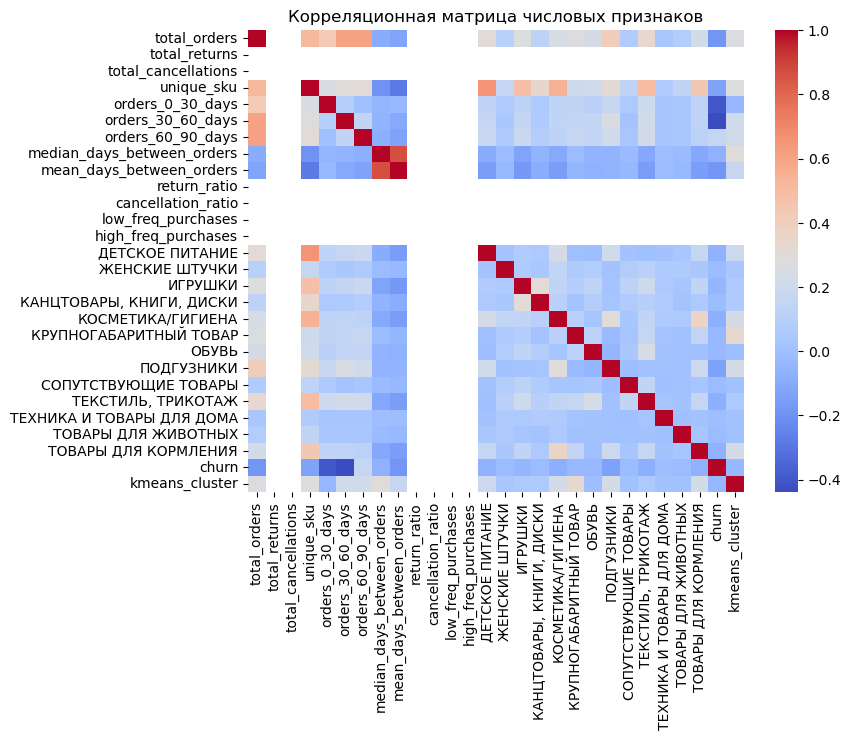

churn    1.0
Name: churn, dtype: float64


In [ ]:
numeric_data = customer_data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Корреляционная матрица числовых признаков")
plt.show()

churn_corr = corr_matrix['churn'].abs().sort_values(ascending=False)

print(churn_corr[churn_corr > 0.7])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


In [ ]:
drop_columns = ['last_order_date', 'total_orders', 'orders_0_30_days']  # примеры зависимых
customer_data = customer_data.drop(columns=drop_columns, errors='ignore')

features = [col for col in customer_data.columns if col not in ['Телефон_new', 'churn']]
X = customer_data[features]
y = customer_data['churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}


🔹 Обучение модели: Logistic Regression
Accuracy: 0.8735
Precision: 0.6580
Recall: 0.9708
F1-Score: 0.7844
ROC-AUC: 0.9605
              precision    recall  f1-score   support

      Stayed       0.99      0.84      0.91      6060
     Churned       0.66      0.97      0.78      1883

    accuracy                           0.87      7943
   macro avg       0.82      0.91      0.85      7943
weighted avg       0.91      0.87      0.88      7943



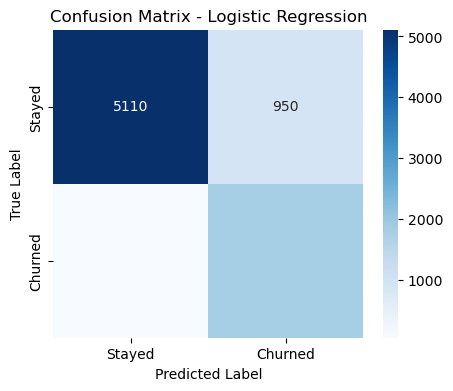


🔹 Обучение модели: Random Forest
Accuracy: 0.9836
Precision: 0.9611
Recall: 0.9703
F1-Score: 0.9656
ROC-AUC: 0.9981
              precision    recall  f1-score   support

      Stayed       0.99      0.99      0.99      6060
     Churned       0.96      0.97      0.97      1883

    accuracy                           0.98      7943
   macro avg       0.98      0.98      0.98      7943
weighted avg       0.98      0.98      0.98      7943



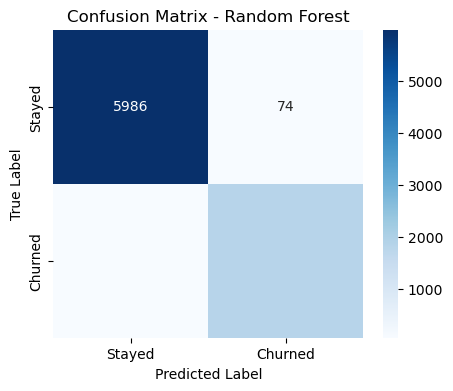


🔹 Обучение модели: XGBoost
Accuracy: 0.9858
Precision: 0.9648
Recall: 0.9756
F1-Score: 0.9702
ROC-AUC: 0.9989
              precision    recall  f1-score   support

      Stayed       0.99      0.99      0.99      6060
     Churned       0.96      0.98      0.97      1883

    accuracy                           0.99      7943
   macro avg       0.98      0.98      0.98      7943
weighted avg       0.99      0.99      0.99      7943



/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


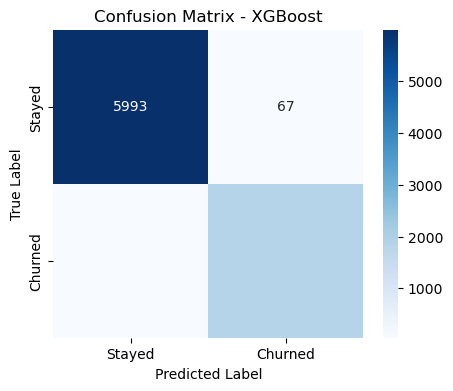

In [ ]:
for name, model in models.items():
    print(f"\n🔹 Обучение модели: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    results[name] = {
        "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "ROC-AUC": roc_auc
    }

    # Вывод результатов
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Stayed', 'Churned']))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
results_df = pd.DataFrame(results).T
print("\n🔹 Итоговые метрики моделей:")
display(results_df)



🔹 Итоговые метрики моделей:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.873473,0.658027,0.970791,0.784381,0.960537
Random Forest,0.983633,0.961073,0.970260,0.965645,0.998111
XGBoost,0.985774,0.964811,0.975571,0.970161,0.998856


#### Избавляемся от переобучения

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

📊 Logistic Regression Model Metrics:
  Accuracy: 0.8735
  Precision: 0.6581
  Recall: 0.9703
  F1-Score: 0.7843
  ROC-AUC: 0.9068

📊 Random Forest Model Metrics:
  Accuracy: 0.9670
  Precision: 0.8786
  Recall: 0.9989
  F1-Score: 0.9349
  ROC-AUC: 0.9780

📊 XGBoost Model Metrics:
  Accuracy: 0.9855
  Precision: 0.9643
  Recall: 0.9750
  F1-Score: 0.9696
  ROC-AUC: 0.9819



/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


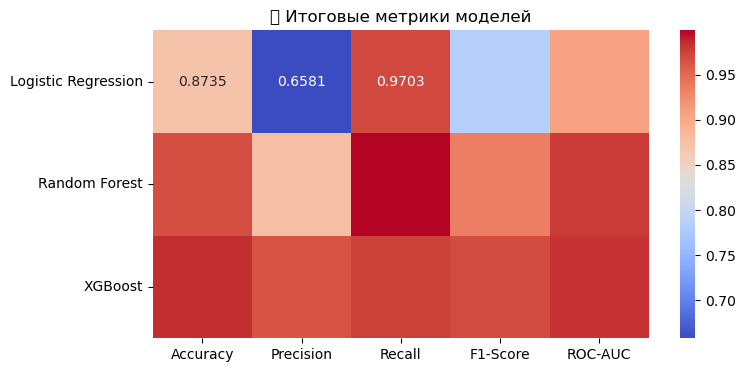

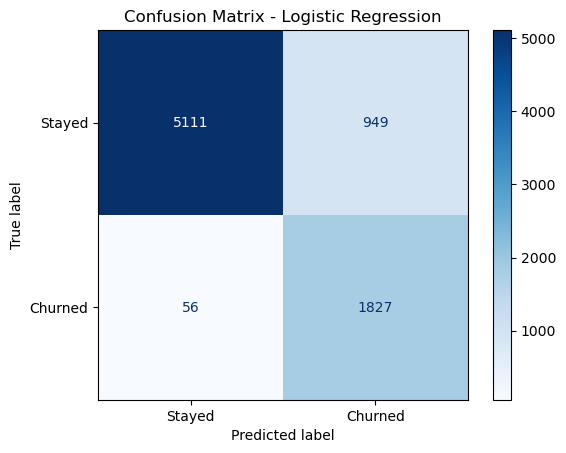

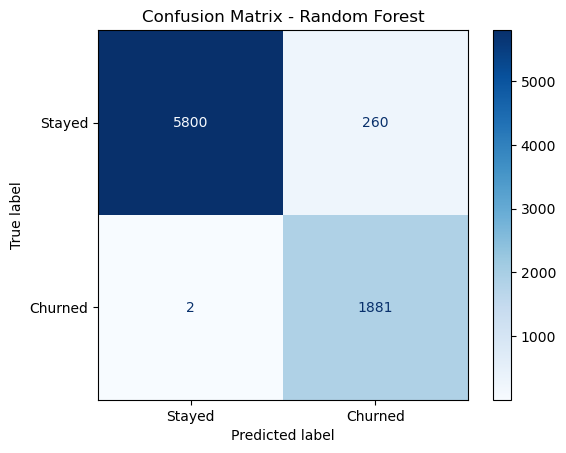

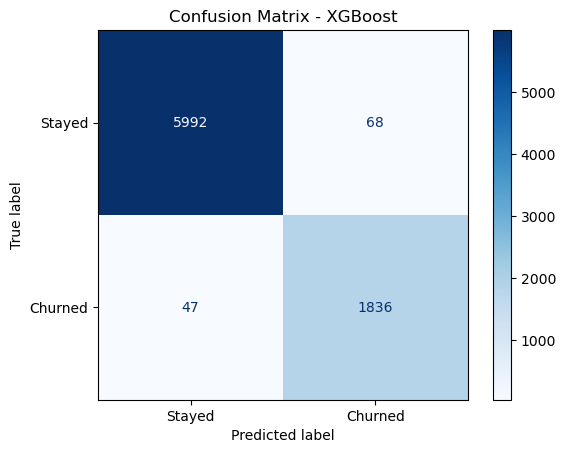

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Подготовка данных
features = [
     'total_returns', 'total_cancellations', 'unique_sku',
     'orders_30_60_days', 'orders_60_90_days',
    'median_days_between_orders', 'mean_days_between_orders',
    'return_ratio', 'cancellation_ratio', 'low_freq_purchases',
    'high_freq_purchases', 'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
    'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
    'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
    'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
    'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'kmeans_cluster'
]

X = customer_data[features]
y = customer_data['churn']

# Разбиение на train/test с балансировкой классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 1. Логистическая регрессия с балансом классов ===
logreg = LogisticRegression(class_weight='balanced', max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# === 2. Random Forest с уменьшенной сложностью ===
rf = RandomForestClassifier(
    n_estimators=100,  # Уменьшено количество деревьев
    max_depth=10,  # Ограничена глубина деревьев
    min_samples_split=5,  # Минимальное количество объектов в узле
    min_samples_leaf=3,  # Минимальное число объектов в листе
    class_weight='balanced',  # Баланс классов
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# === 3. XGBoost с регуляризацией и кросс-валидацией ===
xgb = XGBClassifier(
    n_estimators=150,  # Уменьшено количество деревьев
    max_depth=6,  # Ограничена глубина деревьев
    learning_rate=0.1,  # Снижена скорость обучения
    subsample=0.8,  # Используем подвыборку объектов
    colsample_bytree=0.8,  # Используем подвыборку признаков
    reg_lambda=1.5,  # L2-регуляризация
    reg_alpha=0.5,  # L1-регуляризация
    random_state=42,
    use_label_encoder=False
)

# Кросс-валидация XGBoost
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=skf, scoring='roc_auc')

# Обучение XGBoost после кросс-валидации
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# === Оценка моделей ===
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"📊 {name} Model Metrics:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}\n")
    return [acc, prec, rec, f1, roc_auc]

results = {
    "Logistic Regression": evaluate_model("Logistic Regression", y_test, y_pred_logreg),
    "Random Forest": evaluate_model("Random Forest", y_test, y_pred_rf),
    "XGBoost": evaluate_model("XGBoost", y_test, y_pred_xgb),
}

# === Визуализация результатов ===
import seaborn as sns
import matplotlib.pyplot as plt

# Таблица метрик
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
plt.figure(figsize=(8, 4))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="coolwarm")
plt.title("📈 Итоговые метрики моделей")
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, y_pred in zip(["Logistic Regression", "Random Forest", "XGBoost"], [y_pred_logreg, y_pred_rf, y_pred_xgb]):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Stayed", "Churned"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Logistic Regression Model Metrics:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      6060
           1       0.68      0.94      0.79      1883

    accuracy                           0.88      7943
   macro avg       0.83      0.90      0.85      7943
weighted avg       0.91      0.88      0.89      7943


📊 Random Forest Model Metrics:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      6060
           1       0.88      1.00      0.94      1883

    accuracy                           0.97      7943
   macro avg       0.94      0.98      0.96      7943
weighted avg       0.97      0.97      0.97      7943


📊 XGBoost Model Metrics:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6060
           1       0.93      0.99      0.96      1883

    accuracy                           0.98      7943
   macro avg       0.96      

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


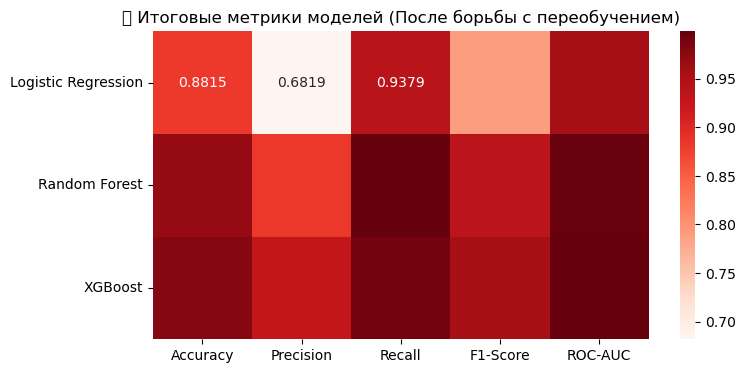

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Для балансировки классов

# ⚙️ 1. Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(
    customer_data[features], customer_data['churn'], test_size=0.2, random_state=42, stratify=customer_data['churn']
)

# Балансировка классов, если сильно дисбаланс
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# ⚙️ 2. Обучение моделей с защитой от переобучения
# 🔹 Логистическая регрессия (с L2-регуляризацией)
logreg = LogisticRegression(C=0.5, class_weight='balanced', solver='liblinear')
logreg.fit(X_train_balanced, y_train_balanced)

# 🔹 Random Forest (Ограниченная глубина, регуляризация, балансировка)
rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5,
    class_weight='balanced', random_state=42
)
rf.fit(X_train_balanced, y_train_balanced)

# 🔹 XGBoost (Регуляризация, subsample, ограничение глубины)
xgb = XGBClassifier(
    n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
    reg_lambda=10, reg_alpha=2, scale_pos_weight=1.5, use_label_encoder=False,
    eval_metric="logloss", random_state=42
)
xgb.fit(X_train_balanced, y_train_balanced)

# ⚙️ 3. Оценка моделей
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'XGBoost': xgb}
metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    print(f"\n📊 {name} Model Metrics:\n", classification_report(y_test, y_pred))

# Вывод результатов
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(metrics).T
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, cmap="Reds", fmt=".4f")
plt.title("📊 Итоговые метрики моделей (После борьбы с переобучением)")
plt.show()


# Перетеки из кластера в кластер

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture  # EM-кластеризация
from sklearn.decomposition import PCA

In [ ]:
df_numeric = customer_data.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


In [ ]:
n_clusters = 12 

# Применяем EM-кластеризацию (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

In [ ]:
customer_data['gmm_cluster'] = gmm_labels

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/4283041532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['gmm_cluster'] = gmm_labels


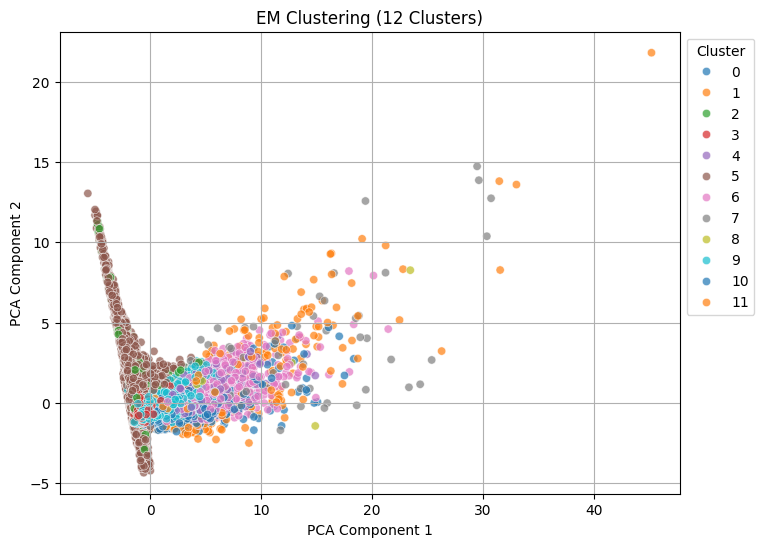

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_labels, palette='tab10', alpha=0.7)
plt.title("EM Clustering (12 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

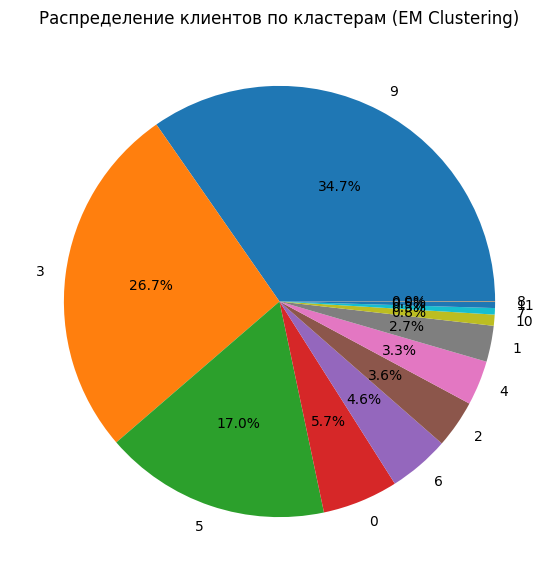

In [ ]:
plt.figure(figsize=(7, 7))
cluster_counts = pd.Series(gmm_labels).value_counts()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette("tab10", len(cluster_counts)))
plt.title("Распределение клиентов по кластерам (EM Clustering)")
plt.show()

<!-- STME (Sequential Temporal Market Evolution) — это методология, которая позволяет анализировать изменения в сегментах клиентов со временем. В твоем проекте STME поможет понять: -->



In [ ]:
stme_data = customer_data.copy()
stme_data['last_order_date'] = pd.to_datetime(stme_data['last_order_date'])

stme_data['quarter'] = stme_data['last_order_date'].dt.to_period('Q')

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stme_data.select_dtypes(include=[np.number]))


In [ ]:
n_clusters = 12
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
stme_data['gmm_cluster'] = gmm.fit_predict(scaled_data)

In [ ]:
# Группируем по кварталам и кластерам
quarterly_clusters = stme_data.groupby(['quarter', 'gmm_cluster']).size().unstack(fill_value=0)
quarterly_clusters

gmm_cluster,0,1,2,3,4,5,6,7,8,9,10,11
quarter,,,,,,,,,,,,
2017Q1,770,0,54,27,165,4,100,9,0,164,378,1036
2017Q2,12999,2446,1361,884,4136,182,1221,97,99,1644,2677,9258


<Figure size 1200x600 with 0 Axes>

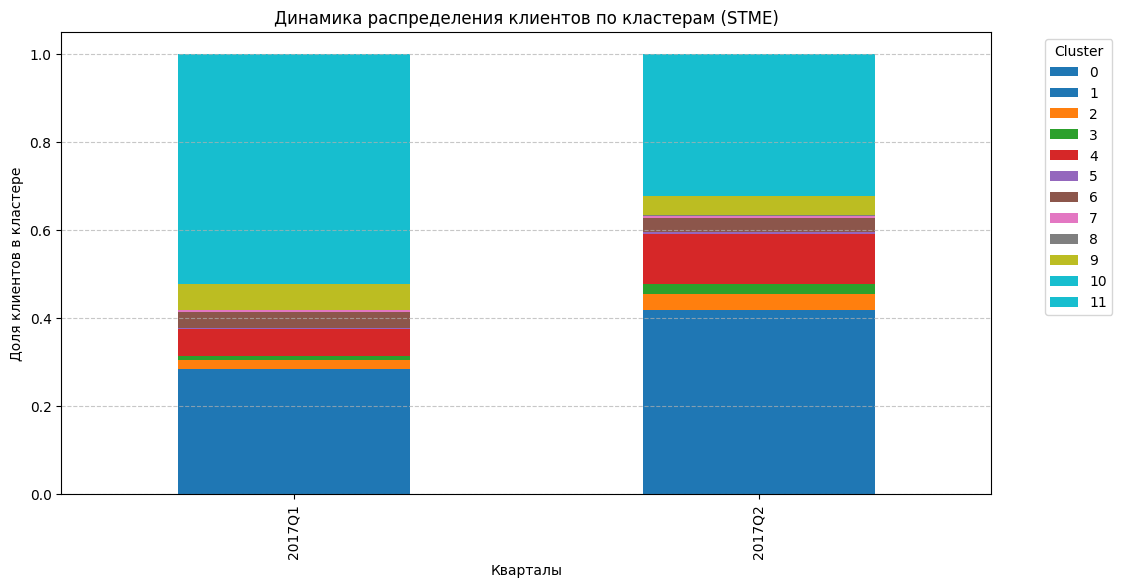

In [ ]:
#  Визуализация динамики кластеров (STME)
quarterly_clusters_normalized = quarterly_clusters.div(quarterly_clusters.sum(axis=1), axis=0)

# Визуализируем изменения долей кластеров по кварталам
plt.figure(figsize=(12, 6))
quarterly_clusters_normalized.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12, 6))
plt.title("Динамика распределения клиентов по кластерам (STME)")
plt.xlabel("Кварталы")
plt.ylabel("Доля клиентов в кластере")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/3005874131.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  transition_matrix = transition_matrix.fillna(method='ffill', axis=1)


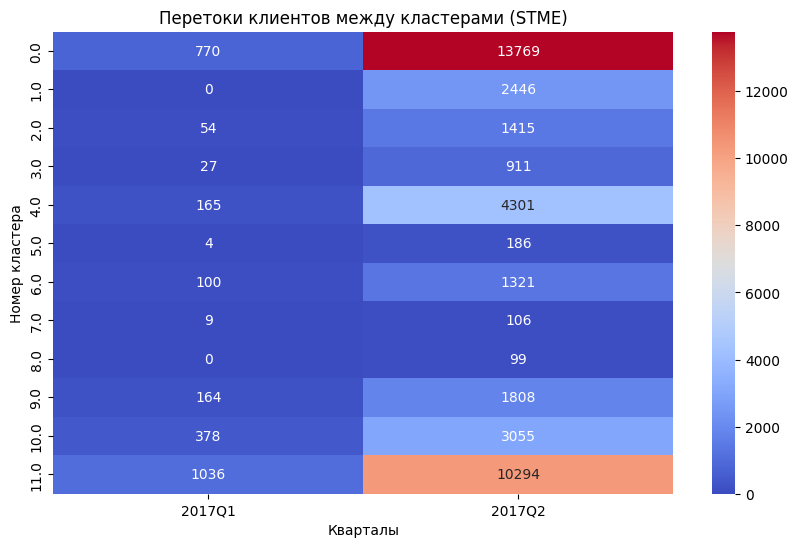

In [ ]:
## Анализ перетоков клиентов между сегментами

# Создаем таблицу перетоков клиентов
transition_matrix = stme_data.pivot_table(index='Телефон_new', columns='quarter', values='gmm_cluster', aggfunc='first')

# Заполняем пропущенные значения предыдущими значениями (если клиент остался в том же кластере)
transition_matrix = transition_matrix.fillna(method='ffill', axis=1)

# Строим тепловую карту перетоков (какие кластеры меняются чаще всего)
plt.figure(figsize=(10, 6))
sns.heatmap(transition_matrix.apply(pd.Series.value_counts).fillna(0), cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Перетоки клиентов между кластерами (STME)")
plt.xlabel("Кварталы")
plt.ylabel("Номер кластера")
plt.show()


<Figure size 1200x600 with 0 Axes>

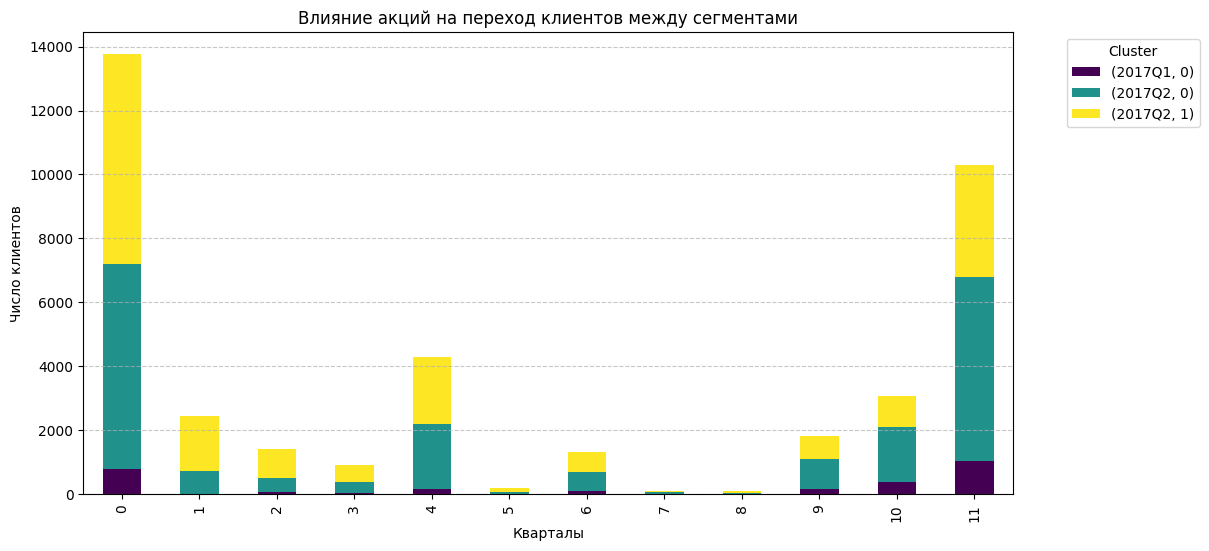

In [ ]:
## Анализ влияния акций на перетоки

# Добавляем фичу "участвовал в акции" (например, за последние 30 дней)
stme_data['participated_in_promo'] = (stme_data['orders_0_30_days'] > 0).astype(int)

# Группируем клиентов по наличию акций и смотрим изменения кластеров
promo_impact = stme_data.groupby(['quarter', 'participated_in_promo', 'gmm_cluster']).size().unstack(fill_value=0)

# Визуализация влияния акций
plt.figure(figsize=(12, 6))
promo_impact.T.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Влияние акций на переход клиентов между сегментами")
plt.xlabel("Кварталы")
plt.ylabel("Число клиентов")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Анализ STME показал, что в 2017Q1 кластер **0** содержал **770** клиентов, а во 2017Q2 их число увеличилось до **13769**, что свидетельствует о значительном притоке клиентов. Кластер **4** также вырос с **165** до **4301** клиентов. В то же время кластер **1** в 2017Q1 насчитывал **0** клиентов, но во 2017Q2 увеличился до **2446**. Доля клиентов в кластерах 10 и 11 остается доминирующей, но наблюдается перераспределение между сегментами. Это указывает на значительные перетоки клиентов между сегментами, особенно в кварталах с активными изменениями в маркетинговых стратегиях.

# RFM 

In [ ]:
current_date = customer_data['last_order_date'].max()

In [ ]:
customer_data['Recency'] = (current_date - customer_data['last_order_date']).dt.days
customer_data['Frequency'] = customer_data['total_orders']
customer_data['Monetary'] = customer_data['unique_sku']

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/1505931200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Recency'] = (current_date - customer_data['last_order_date']).dt.days
/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/1505931200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Frequency'] = customer_data['total_orders']
/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/1505931200.py:3: SettingWithCopyWarning: 
A val

In [ ]:
# Нормализуем данные
rfm_features = customer_data[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
customer_data['RFM_Cluster'] = kmeans.fit_predict(rfm_scaled)

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/3593756818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['RFM_Cluster'] = kmeans.fit_predict(rfm_scaled)


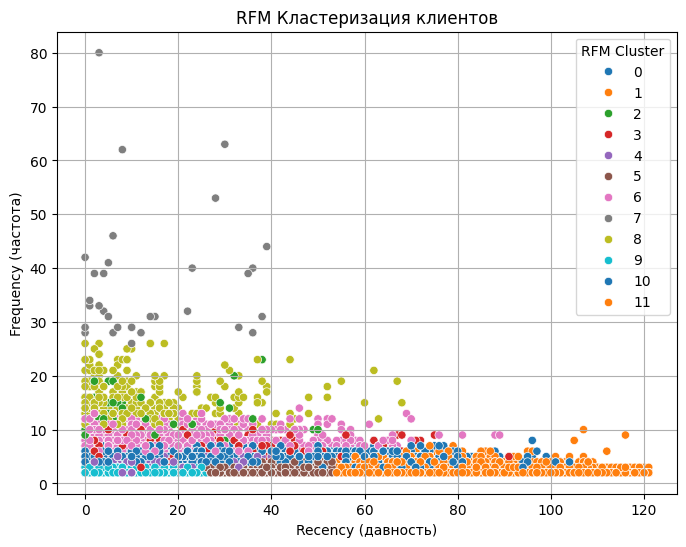

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['Recency'], y=customer_data['Frequency'], hue=customer_data['RFM_Cluster'], palette='tab10')
plt.xlabel('Recency (давность)')
plt.ylabel('Frequency (частота)')
plt.title('RFM Кластеризация клиентов')
plt.legend(title="RFM Cluster", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
rfm_summary = customer_data.groupby('RFM_Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean', 'Телефон_new': 'count'}).rename(columns={'Телефон_new': 'Count'})
rfm_summary

,Recency,Frequency,Monetary,Count
RFM_Cluster,,,,
0,19.189342,4.770629,10.560167,4072
1,97.196902,2.176412,6.220140,4002
2,13.713333,9.386667,127.860000,150
3,23.010427,5.144076,60.755450,1055
4,17.863941,3.253789,28.167430,2837
5,39.757245,2.349701,6.457337,8696
6,17.673927,7.905414,25.822029,1607
7,13.515152,37.212121,92.545455,33
8,12.764516,15.429032,52.190323,310


- **Лояльные и активные клиенты** → кластеры 2, 7, 8.
- **Недавно купившие с потенциалом к возврату** → кластеры 0, 3, 4, 6.
- **Ушедшие клиенты** → кластеры 1, 10, 11.
- **Редкие покупатели с потенциалом роста** → кластер 5.

# Предсказание покупок и перетоки клиентов:
Предсказываем покупку в следующем месяце.
Анализируем изменение сегментации раз в квартал.
Добавляем фичу акций и проверяем их влияние.

1. Предсказание покупок в следующем месяце

**Цель** построить модель, предсказывающую, сделает ли клиент покупку в следующем месяце.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
customer_data['purchase_next_month'] = np.where(
    (customer_data['last_order_date'] + pd.DateOffset(months=1) >= customer_data['last_order_date'].max()),
    1, 0
)

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_29473/2127458357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['purchase_next_month'] = np.where(


In [ ]:
features = ['Recency', 'Frequency', 'Monetary', 'gmm_cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    customer_data[features], customer_data['purchase_next_month'], 
    test_size=0.2, random_state=42, stratify=customer_data['purchase_next_month']
)

y_train.value_counts(normalize=True)

purchase_next_month
0    0.528519
1    0.471481
Name: proportion, dtype: float64

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Оценка метрик
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf}

for name, y_pred in models.items():
    print(f"\n📊 {name} Model Metrics:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")



📊 Logistic Regression Model Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC-AUC: 1.0000

📊 Random Forest Model Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC-AUC: 1.0000


In [ ]:

# from sklearn.metrics import confusion_matrix

# def plot_conf_matrix(y_true, y_pred, model_name):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(5,4))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.title(f"Confusion Matrix - {model_name}")
#     plt.show()

# # Визуализация confusion matrix
# for name, y_pred in models.items():
#     plot_conf_matrix(y_test, y_pred, name)


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Убираем утечки данных
features = [col for col in X_train.columns if col not in ['last_order_date', 'churn']]

# Stratified K-Fold для устойчивых метрик
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression с регуляризацией
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l2', C=0.1)
log_reg.fit(X_train[features], y_train)

# Random Forest с ограничением глубины
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=5, min_samples_split=10)
rf.fit(X_train[features], y_train)


# Пересчёт предсказаний
y_pred_log = log_reg.predict(X_test[features])
y_pred_rf = rf.predict(X_test[features])


In [ ]:
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf}

for name, y_pred in models.items():
    print(f"\n📊 {name} Model Metrics:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")



📊 Logistic Regression Model Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC-AUC: 1.0000

📊 Random Forest Model Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC-AUC: 1.0000


In [ ]:
import pandas as pd

correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print(correlation.head(10))  # Топ-10 признаков по корреляции с таргетом


Recency        0.805458
Frequency      0.219290
Monetary       0.156581
gmm_cluster    0.106729
dtype: float64
